### UNIVERSIDAD C0MPLUTENSE DE MADRID (2022-2023)
### Final Master's Project:
## ANALYSIS, FORECAST AND VISUALIZATION  OF ENERGY METRICES AND BALANCES
### Company: MRC
### Authors: GROUP 1 (Antonio, Elejandro, Nam, Ruth, Eduado, Angel)

# I. About the dataset

- We use the dataset **Energy balance matrix** from 1970 to 2021 of Brazil. The dataset is downloaded in the website of 
Olade.

https://sielac.olade.org/

data here: https://github.com/NamNguyen2015/TFM/blob/main/datas/Option_B/Brazil_Energy%20balance%20matrix.xlsx

- The calculations for data processing base on the **Manual Olade 2011**

https://github.com/NamNguyen2015/TFM/blob/main/reference_documents/Manual%20Olade%202011.pdf

### Scope of work:

**a. Background and rationale**
        
Energy matrices are important tools in the field of energy planning and analysis. They provide a comprehensive overview of energy sources, consumption, and related factors within a particular region or system. They serve various purposes, including:
    
    • Allow policy makers to formulate and implement affective measures.
    
    • Help identify energy inefficiencies.
    
    • Play a crucial role in assessing the environmental impact of different energy sources.
    
**b. Approach and methodology**

The objective is to assess the evolution of an energy matrix for a specific country or region over time and develop a mid-term projection. In this context, data analysis plays a crucial role by:

    • Collecting and organizing the data in a structured format, ensuring its quality and consistency. This step is vital to establish a reliable foundation for further analysis.
    
    • Performing exploratory data analysis (EDA) to gain a preliminary understanding of the data. EDA helps uncover patterns, trends, and relationships within the energy matrix dataset. It provides insights into the variables at hand and informs subsequent analytical steps.
   
    • Building indicators to effectively evaluate and analyse the energy matrices. These indicators serve as measurable metrics that reflect specific aspects of the energy system, facilitating meaningful comparisons and assessments.
   
    • Developing a mid-term projection of the energy matrix using suitable machine learning algorithms and econometric techniques. By using historical data, economic and demographic projections, and applying appropriate modelling techniques, it is possible to project future trends in the energy matrix. These projections provide valuable insights into potential changes in energy sources, consumption patterns, and related factors. Decision-makers can utilize this information to formulate effective strategies and policies for the future, aiming for a more sustainable and resilient energy system.
    
    • Constructing visualizations such as Sankey charts and other relevant figures to analyse the energy matrices and present key information.1 Visual representations enhance the comprehension and communication of complex data, enabling stakeholders to grasp trends, interconnections, and potential areas for improvement more easily.


## I.1 Load the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Load the file
import requests
from io import BytesIO
file_path = '../datas/Option_B/Brazil_Energy balance matrix.xlsx'
url="https://github.com/NamNguyen2015/TFM/blob/main/datas/Option_B/Brazil_Energy%20balance%20matrix.xlsx"

#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)


# Create a new dictionary to store modified dataframes
modified_dict = {}

for k, df in Dict.items():
    
    # Round the values of each column in the dataframe with 2 decimals
    df = df.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    
    # Ignore the first row (unit) in each df
    df = df.iloc[1:]

    # Rename columns in df
    df.rename(columns={'Unnamed: 0': 'SECTOR', 'OTHER PRIMARY_x000d_\n': 'OTHER PRIMARY'}, inplace=True)

    # Remove space in column names and Sector names
    df.columns = df.columns.str.strip()
    df['SECTOR'] = df['SECTOR'].str.strip()

    # Rename in a row
    df['SECTOR'].replace({'COKE PLANTS AND BLAST FURNACES_x000d_': 'COKE PLANTS AND BLAST FURNACES'}, inplace=True)
    
    # fill nule values
    df=df.fillna(np.nan)

    # Convert the keys of Dict to only contain the year
    k_new = k.split(' - ')[0]
    df["YEAR"] = k_new

    # Change all column names to uppercase
    df.columns = df.columns.str.upper()

    # Store the modified dataframe in the new dictionary
    modified_dict[k_new] = df
    
    # Change the unit from Ktoe to Mtoe:
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].astype(float)
            df[column]=df[column]/1000
    
    
    # Round the values of each column in the dataframe with 2 decimals
    df = df.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Update the original dictionary with the modified dataframes
Dict = modified_dict


print(Dict.keys())

#Save the Clean Dictionary in Excel with multi-sheet_names
file_path='../datas/Option_B/Datas_cleaned/Brazil_Energy balance matrix_cleaned.xlsx'
    
with pd.ExcelWriter(file_path) as writer:
    for k, df in Dict.items():
        df.to_excel(writer, sheet_name=k)



dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])


## I.2 Frist visualization of energy balance (Supply-Transformation-Losses-Consumption)

In [3]:
# Concatenate the data
for k in Dict.keys():    
     # Concatenate all DataFrames in Dict vertically
    df_concat = pd.concat(Dict.values(), ignore_index=True)
    df_concat.set_index("YEAR", inplace=True)
    df_concat.index = df_concat.index.astype(int)
    #df_concat.index = pd.to_datetime(df_concat.index, format='%Y')
    
df_concat.head()

SECTOR       OIL  NATURAL GAS     COAL  HYDROENERGY  GEOTHERMAL  \
YEAR                                                                          
1970    PRODUCTION   8.16158      1.10224  1.04443      3.42152         NaN   
1970        IMPORT  17.84505          NaN  1.35847          NaN         NaN   
1970        EXPORT   0.06505          NaN      NaN          NaN         NaN   
1970  STOCK CHANGE  -0.27733          NaN -0.16752          NaN         NaN   
1970        UNUSED       NaN      0.92222      NaN          NaN         NaN   

      NUCLEAR  FIREWOOD  SUGARCANE AND PRODUCTS  OTHER PRIMARY  ...  \
YEAR                                                            ...   
1970      NaN  31.85153                  3.6007        0.22324  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   

      KEROSENE/JET FUEL  DIESEL OIL  FUEL OIL     COKE  CHARCOAL    GASES  \
YEAR                                                                        
1970            1.30721     5.67461   8.39923  0.05518   1.76675  0.46595   
1970            0.00819         NaN       NaN  0.07242       NaN      NaN   
1970            0.12291     0.04715   0.74834      NaN       NaN      NaN   
1970           -0.05486    -0.04201  -0.06903 -0.02483       NaN      NaN   
1970                NaN         NaN       NaN      NaN       NaN  0.05588   

      OTHER SECONDARY  NON-ENERGY  TOTAL SECUNDARIES     TOTAL  
YEAR                                                            
1970          0.32173     0.88677           31.06807  49.40524  
1970              NaN     0.36892            0.93748  20.14101  
1970              NaN         NaN            0.92012   0.98517  
1970          0.01541    -0.05393           -0.34528  -0.79013  
1970          0.05045         NaN            0.10633   1.02854  

[5 rows x 24 columns]

### Show the data summary over years

In [4]:
# Group by Year and SECTOR, and sum the TOTAL values
selected_SECTORS=['TOTAL SUPPLY','TOTAL TRANSFORMATION','LOSSES','FINAL CONSUMPTION']
df_summary=df_concat.copy()

#df_summary=df_summary.apply(lambda column: column.fillna(0))
df_summary=df_summary[df_summary['SECTOR'].isin(selected_SECTORS)]
df_summary = df_summary.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_summary = df_summary.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_summary = df_summary[selected_SECTORS]

# Display the resultdf_summary
df_summary.head()

SECTOR  TOTAL SUPPLY  TOTAL TRANSFORMATION   LOSSES  FINAL CONSUMPTION
YEAR                                                                  
1970        66.74240              -5.42247  0.92920           58.83412
1971        70.09203              -5.43772  1.02493           61.69169
1972        75.11133              -5.93688  1.14603           65.99512
1973        81.96344              -6.48878  1.26921           71.69286
1974        87.62820              -6.95924  1.45878           76.19840

### Visualize the data summary

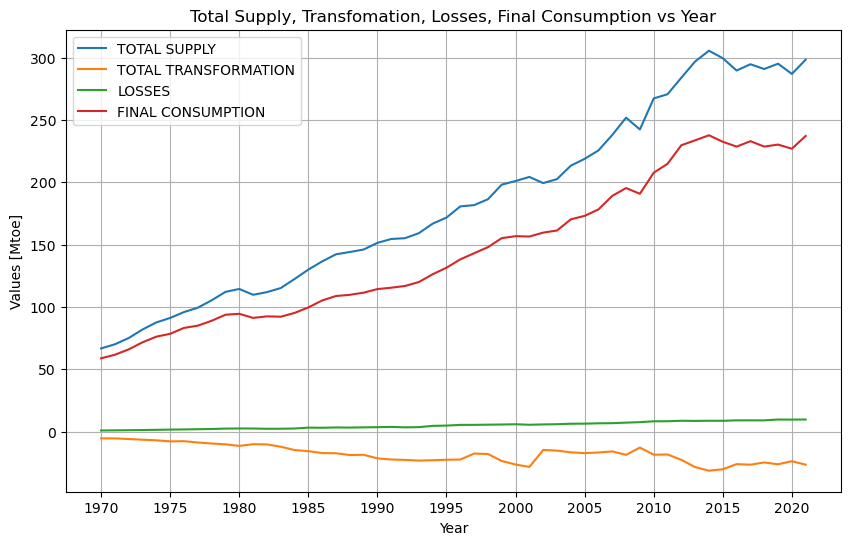

In [5]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

#for k in selected_SECTORS:
 #   df_k=df_concat.loc[df_concat["SECTOR"]==k].drop(columns=["SECTOR"], axis=1)
  #  sns.lineplot(data=df_k, x=df_k.index, y='TOTAL', label=k, ax=ax)

for col in df_summary.columns:
    sns.lineplot(data=df_summary[col], x=df_summary.index, y=df_summary[col], label=col, ax=ax)
        
# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel(f'Values [Mtoe]')
ax.set_title(f'Total Supply, Transfomation, Losses, Final Consumption vs Year')
ax.set_xticks(df_summary.index.unique()[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()




The negative transformation values over  years typically means that more energy was consumed or transformed within the energy system than was produced or input into the system during that specific time period (year). In other words, it indicates an energy deficit or a situation where the energy demands and transformations within the system exceeded the energy available from primary sources or imports.

In [6]:
# check the Import- Export:

# Group by Year and SECTOR, and sum the TOTAL values
selected_SECTORS=['PRODUCTION','IMPORT','EXPORT']
df_=df_concat.copy()

#df_summary=df_summary.apply(lambda column: column.fillna(0))
df_=df_[df_['SECTOR'].isin(selected_SECTORS)]
df_= df_.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_= df_.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_= df_[selected_SECTORS]

# Display the resultdf_summary
df_.head()


SECTOR  PRODUCTION    IMPORT   EXPORT
YEAR                                 
1970      49.40524  20.14101  0.98517
1971      50.17810  23.24845  1.26902
1972      51.43880  28.27661  2.65150
1973      52.14896  37.87693  3.53330
1974      54.59425  37.90801  3.48441

<AxesSubplot:title={'center':'Evolution of Import- Export'}, xlabel='YEAR', ylabel='Mtoe'>

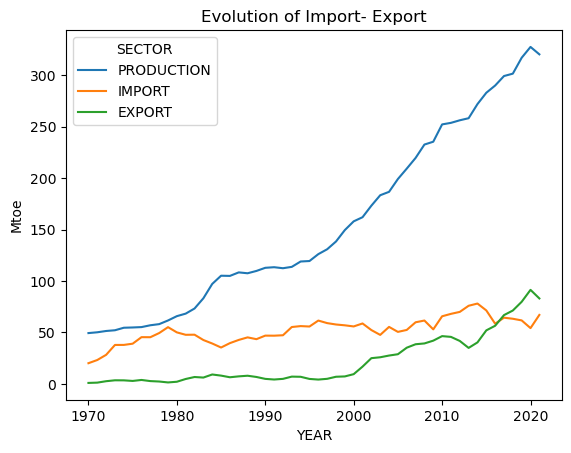

In [7]:
df_.plot(ylabel="Mtoe", title="Evolution of Import- Export")


It has been observed that in recent years, Brazil has become increasingly self-sufficient in energy production and less reliant on imports. Starting in 2015, the country also began exporting its energy production.

## I.3 Sankey Diagram

- Sankey diagrams are valuable tools for visualizing energy flows and understanding energy balances in complex systems. 

- Reviewing Sankey diagrams in an energy balance context is crucial for gaining insights into energy flows, identifying inefficiencies, ensuring a balance between supply and demand, and making informed decisions about energy policy, efficiency improvements, and environmental management. They provide a concise and visually intuitive representation of complex energy data, making it easier for stakeholders to understand and act upon energy-related challenges and opportunities.

In [8]:
from collections import defaultdict
import plotly.graph_objects as go

### Define the Plot function

In [9]:
# Defining the Plot function
def Plot(year,db):
    label=db[year]["label"]
    source=db[year]["source"]
    target=db[year]["target"]
    value=db[year]["value"]
    color_nodes=db[year]["color_nodes"]
    color_links=db[year]["color_links"]
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 30,
          thickness = 20,
          line = None, # dict(color = "black", width = 0.5),
          label = label,
          color = color_nodes
        ),
        link = dict(
          source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
          target = target,
          value = value,
            color=color_links
      ))])

    fig.update_layout(title_text=year, font_size=10)
    fig.show()

#### Preparation the data to plot

In [10]:
# Preparation the data to plot
def Data_Generate(Dict):
    
    Dict_out = {}  # Initialize the output dictionary
    for sheet_name in Dict.keys():

        df=Dict[sheet_name]
        
         # Reset index
        df=df.set_index('SECTOR')

        # Transpose df
        df=df.T

        # Fill NaN values
        df=df.fillna(np.nan)
        
        #df['PRODUCTION_IMPORT']=df['PRODUCTION']+df['IMPORT']
       
        #print(df.head(5))
        # define the combinations
        Transformers=['REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
               'GAS PLANTS', 'CHARCOAL PLANTS', 'COKE PLANTS AND BLAST FURNACES',
               'DISTILLERIES', 'OTHER CENTERS']
        Primaries=['OIL','NATURAL GAS','COAL','HYDROENERGY','GEOTHERMAL','NUCLEAR','FIREWOOD','SUGARCANE AND PRODUCTS','OTHER PRIMARY']
        Secondaries=['ELECTRICITY','LPG','GASOLINE/ALCOHOL','KEROSENE/JET FUEL','DIESEL OIL','FUEL OIL','COKE','CHARCOAL','GASES','OTHER SECONDARY']
        Consumptions=['TRANSPORT','INDUSTRIAL','RESIDENTIAL','COMMERCIAL, SERVICES, PUBLIC','AGRICULTURE, FISHING AND MINING','CONSTRUCTION AND OTHERS']
        supplies=['PRODUCTION_IMPORT','EXPORT','STOCK CHANGE', 'UNUSED']

        unique_combinations = []

        # here add secondary combination then type of consumption combination
        #for i in supplies:
         #   for j in Primaries+Secondaries:
          #      unique_combinations.append((j, i,abs(df[i][j])))
                
          

        for i in Transformers:
            for j in Primaries:
                unique_combinations.append((j, i,abs(df[i][j])))

        for i in Transformers:
            for j in Secondaries:
                unique_combinations.append((i, j,abs(df[i][j])))

        # the final consumption column - Usage column
        for i in Consumptions:
            for j in Primaries+Secondaries:
                unique_combinations.append((j, i,abs(df[i][j])))
                
        #for i in Primaries+Secondaries:
         #   unique_combinations.append((i, i+'-PRODUCTION_IMPORT',abs(df['PRODUCTION_IMPORT'][i]))) 
                
        label=Transformers+Primaries+Secondaries+Consumptions+Primaries+Secondaries#+[i+'-PRODUCTION_IMPORT' for i in Primaries+Secondaries]

        
        #colors
        color_Transformers=['blue','yellow','green','orange','grey','grey','pink','cyan']
        color_Primaries=['black','orange','darkgray','lightblue','darkred','red','brown','darkgreen','khaki']
        color_Secondaries=['yellow','lightgreen','plum','plum','plum','grey','grey','grey','grey']
        color_Consumptions=['darkmagenta' for i in range(9)]
        color_nodes=color_Transformers+color_Primaries+color_Secondaries+color_Consumptions+color_Primaries+color_Secondaries
        
        # Rename the sheet_name to contain only year. Sample: "1970 - Brazil"--> "1970"
        sheet_name_new = sheet_name.split(' - ')[0]
    
        _dict=Dict_out[sheet_name_new]={}
        _dict["source"]=[]
        _dict["target"]=[]
        _dict["value"]=[]
        _dict["label"]=label
        _dict["color_nodes"]=color_nodes
        _dict["color_links"]=[]
        


        #Dict_out[sheet_name_new] = data  # Store the data in the dictionary
        for k in unique_combinations:
            _dict["source"].append(label.index(k[0]))
            _dict["target"].append(label.index(k[1]))
            _dict["value"].append(k[2])
            _dict["color_links"].append(color_nodes[label.index(k[0])])
    return Dict_out

In [11]:
db=Data_Generate(Dict)

### Sample plot

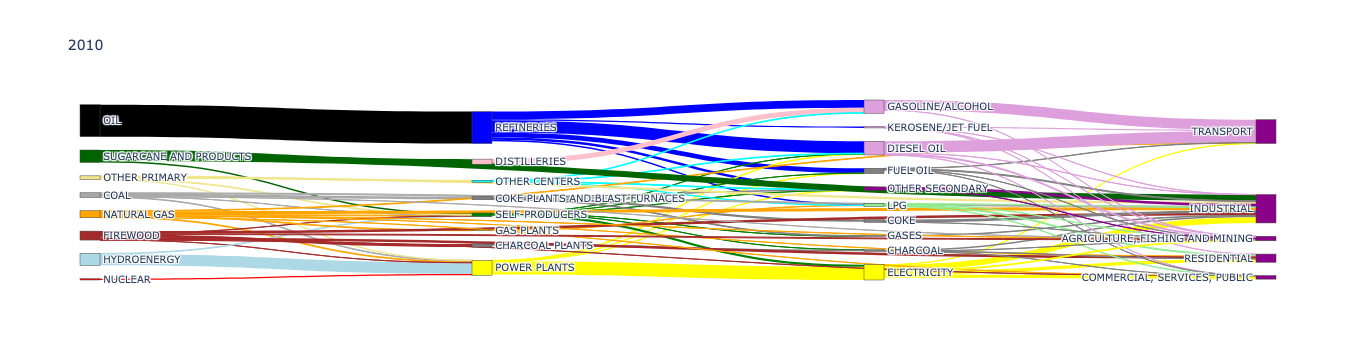

In [12]:
Plot(year='2010',db=db)

## II. DATA ANALYSIS CONSUMPTION



In [13]:
# Show the df final consumption:
df_C=df_concat.copy()

selected_SECTORS_C=['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS',
       'NON-ENERGY CONSUMPTION','FINAL CONSUMPTION']

df_C=df_C[df_C['SECTOR'].isin(selected_SECTORS_C)]
df_C = df_C.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_C = df_C.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_C = df_C[selected_SECTORS_C]

# Display the resultdf_summary
df_C.head()

SECTOR  TRANSPORT  INDUSTRIAL  RESIDENTIAL  COMMERCIAL, SERVICES, PUBLIC  \
YEAR                                                                       
1970     12.66199    16.02092     22.07566                       1.26680   
1971     13.84187    17.45473     22.25396                       1.40698   
1972     15.63322    19.02699     22.44087                       1.57069   
1973     18.32890    21.49343     22.35413                       1.73784   
1974     20.10568    23.25701     22.31670                       1.87346   

SECTOR  AGRICULTURE, FISHING AND MINING  CONSTRUCTION AND OTHERS  \
YEAR                                                               
1970                            5.35101                  0.00000   
1971                            5.31739                  0.00000   
1972                            5.33847                  0.00000   
1973                            5.44191                  0.00000   
1974                            5.37638                  0.00715   

SECTOR  NON-ENERGY CONSUMPTION  FINAL CONSUMPTION  
YEAR                                               
1970                   1.45773           58.83412  
1971                   1.41675           61.69169  
1972                   1.98488           65.99512  
1973                   2.33665           71.69286  
1974                   3.26203           76.19840

In [14]:
# df_C_percentages calculate the percentages

df_C_percentages = (df_C.drop(columns=['FINAL CONSUMPTION']).div(df_C['FINAL CONSUMPTION'], axis=0) * 100)
df_C_percentages = df_C_percentages.round(0)

df_C_percentages.columns

Index(['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'NON-ENERGY CONSUMPTION'],
      dtype='object', name='SECTOR')

In [15]:
# Drop the 'FINAL CONSUMPTION' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_C.drop(columns=["FINAL CONSUMPTION"])



### a- Show the line_plot:

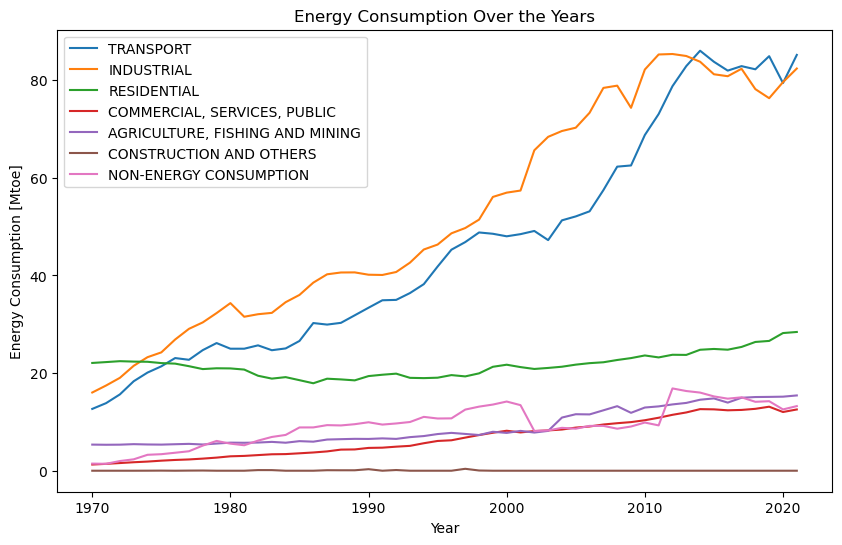

In [16]:
data=df_stackplot.copy()

# Line_Plot:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

data.plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption [Mtoe]')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left')

plt.show()

### b- Plot both stack plots side by side

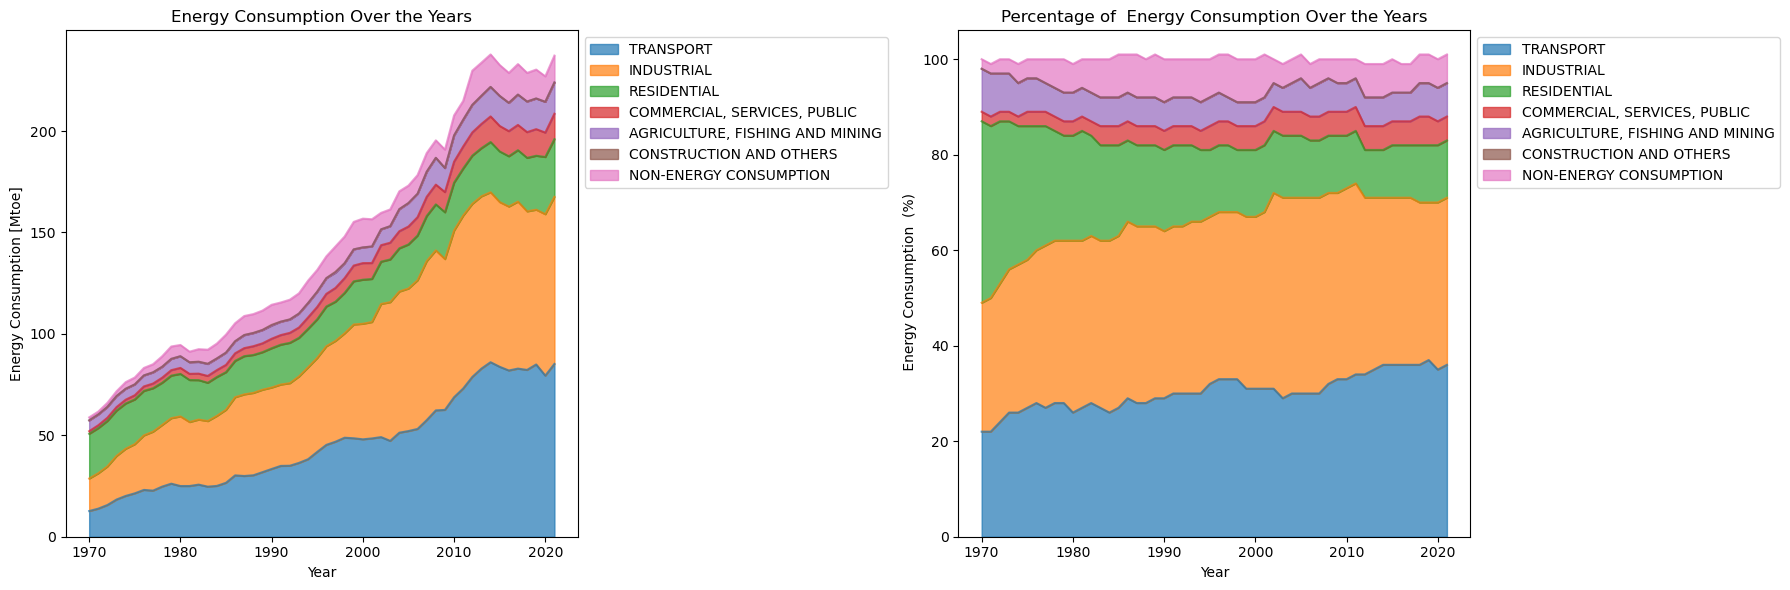

In [17]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))

df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption [Mtoe]')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_C_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

### CORRELATION MATRIX

In [18]:
#df_C.index = pd.to_datetime(df_C.index, format='%Y')
df_C.columns

Index(['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'NON-ENERGY CONSUMPTION',
       'FINAL CONSUMPTION'],
      dtype='object', name='SECTOR')

In [19]:

list_corr=df_C.columns.drop(['FINAL CONSUMPTION'])

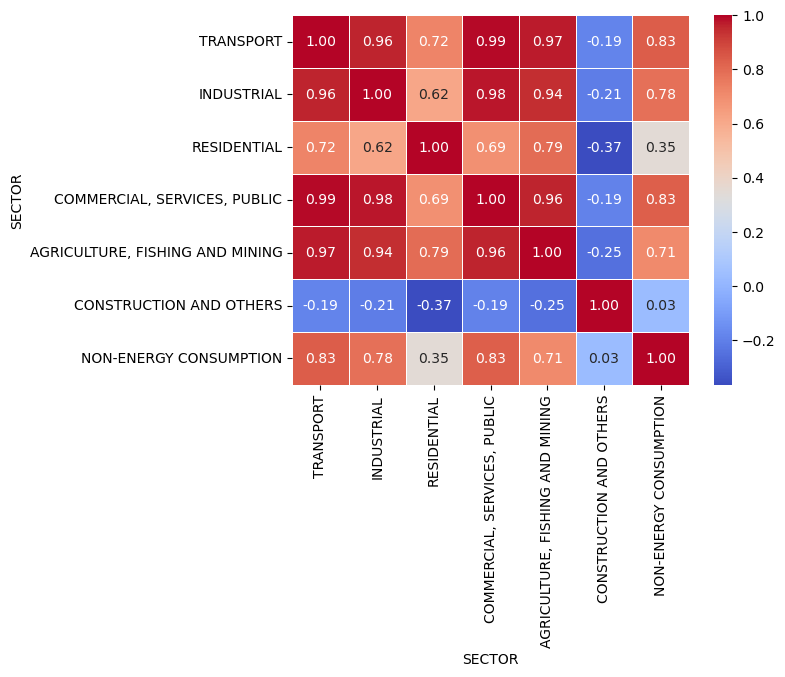

In [20]:

corr_mat = df_C[list_corr].corr()
sns.heatmap(corr_mat,annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.show()

From the correlation matrix, we can observe that the sector **'CONSTRUCTION AND OTHERS'** has a very low correlation with other sectors. We can consider dropping it if necessary.

## Scaled data

### MinMaxScaler
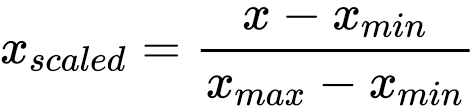

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_C)
scaled_df = pd.DataFrame(scaled_data, columns=df_C.columns)
scaled_df.set_index(df_C.index, inplace=True)

In [22]:
scaled_df.head()

SECTOR  TRANSPORT  INDUSTRIAL  RESIDENTIAL  COMMERCIAL, SERVICES, PUBLIC  \
YEAR                                                                       
1970     0.000000    0.000000     0.395950                      0.000000   
1971     0.016081    0.020678     0.412922                      0.011833   
1972     0.040495    0.043352     0.430713                      0.025652   
1973     0.077235    0.078921     0.422457                      0.039761   
1974     0.101450    0.104355     0.418894                      0.051209   

SECTOR  AGRICULTURE, FISHING AND MINING  CONSTRUCTION AND OTHERS  \
YEAR                                                               
1970                           0.003327                 0.000000   
1971                           0.000000                 0.000000   
1972                           0.002086                 0.000000   
1973                           0.012323                 0.000000   
1974                           0.005838                 0.018204   

SECTOR  NON-ENERGY CONSUMPTION  FINAL CONSUMPTION  
YEAR                                               
1970                  0.002654           0.000000  
1971                  0.000000           0.015970  
1972                  0.036794           0.040021  
1973                  0.059575           0.071865  
1974                  0.119505           0.097046

### ARIMA models for non-stationary time series

We apply the ARIMA model to all sectors, but first, we need to perform some checks to select the best parameters **(p, d, q)**.

In time series analysis, whether we need to scale the data (i.e., standardize or normalize it) depends on the specific characteristics of the data and the modeling techniques we plan to use. Scaling may or may not be required.

In this section, we are focusing on modeling the **univariate** problem.

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score

### Prepare Functions

In [24]:
from sklearn.metrics import mean_absolute_percentage_error 

def MAPE(actual,forecast):
      # Ensure both DataFrames have the same shape
    if actual.shape != forecast.shape:
        raise ValueError("Input data shapes must match.")

    # Replace zero values in y_true with a small non-zero value to avoid division by zero
    actual = actual.replace(0, 1e-10)

    # Calculate the mean of absolute percentage errors 
    mape= round(abs((actual.to_numpy() - forecast.to_numpy()) / actual.to_numpy()).mean()*100,2)

    return mape

In [25]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

In [26]:
# Función para evaluar residuos a través de contrastes de hipótesis
def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    constant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
        
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
        
    Lags should be min(2*seasonal_period, T/5)
        
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
        
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(sm.stats.acorr_ljungbox(x=residuals, lags=lags).lb_pvalue)
    norm_p_val =  stats.jarque_bera(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
        
      
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));
    
    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    plt.show()
    print("** Mean of the residuals: ", np.around(resid_mean,2))
        
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), 
        "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
        
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3),
        "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
        
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), 
        "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    return ts_ax, acf_ax, kde_ax   


####  Find the Best Models by chossing the smallest values of  AIC and BIC

In [27]:
import statsmodels.api as sm
def order_aic_bic(df,d):
    order_aic_bic =[]

    # Loop over p values from 0-4
    for p in range(5):
        # Loop over q values from 0-4
        for q in range(5):

            try:
                # create and fit ARMA(p,q) model
                
                model = ARIMA(df, order=(p, d, q))#,initialization='approximate_diffuse')
                results = model.fit()#maxiter=1000

                # Print order and results
                order_aic_bic.append((p, q, results.aic, results.bic))            
            except:
                print(p, q, None, None)

    # Make DataFrame of model order and AIC/BIC scores
    order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

    # lets sort them by AIC and BIC

    # Sort by AIC
    print("Models sorted by AIC ")
    print("\n")
    print(order_df.sort_values('aic').reset_index(drop=True)[:5])

    # Sort by BIC
    print("Models sorted by BIC ")
    print("\n")
    print(order_df.sort_values('bic').reset_index(drop=True)[:5])

## II.2. Generate for all sectors

### a. Step 1: Manually check to chose d:
In this step, we first check the stationarity of a time series by performing a statistical test, such as the Augmented Dickey-Fuller (ADF) test, and examining the p-value associated with the test. If the p-value is **smaller than 0.05**, we can consider the series as stationary; otherwise, we make the series stationary by applying differencing. The minimum order of differencing is the value of **d**.

Additionally, we plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) at each differencing order. This step allows us to select the appropriate values for 'p' and 'q' based on the characteristics of the ACF and PACF plots.


TRANSPORT-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  1.478493
p-value                         0.997443
#Lags Used                      7.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64
TRANSPORT-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -2.756864
p-value                         0.064704
#Lags Used                      6.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64
TRANSPORT-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -3.444595
p-value                         0.009529
#Lags Used                      4.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)     

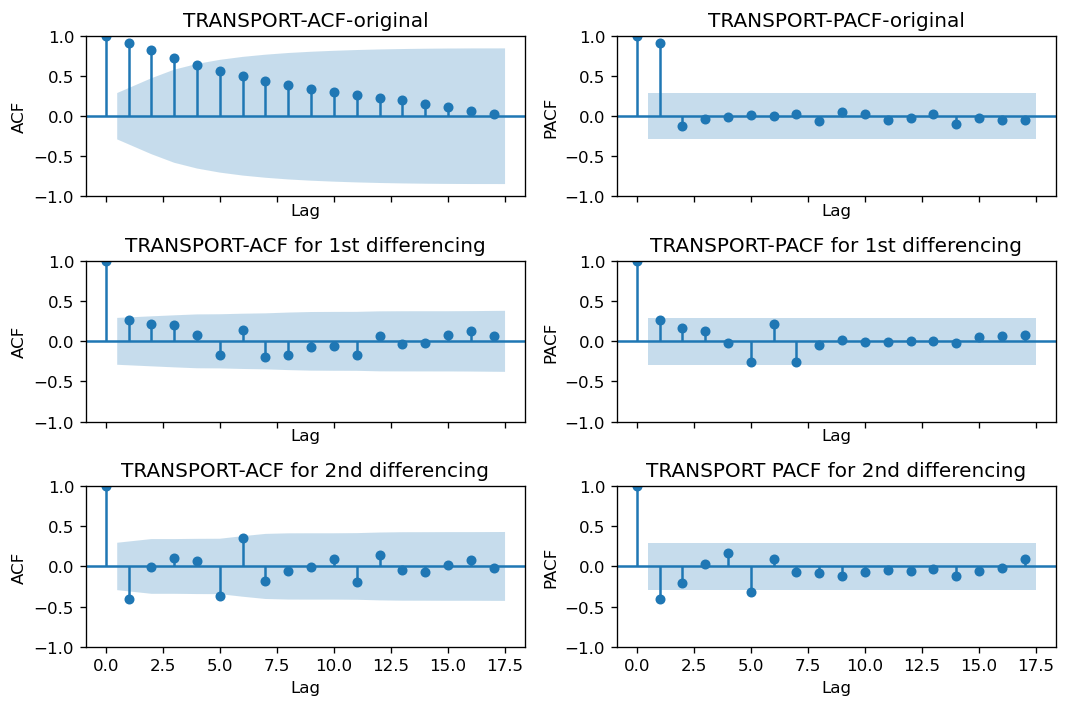

*************************************
INDUSTRIAL-Test the original
Results of Dickey-Fuller Test:
Test Statistic                 -0.449785
p-value                         0.901449
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
INDUSTRIAL-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -5.317197
p-value                         0.000005
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64
INDUSTRIAL-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -3.912924
p-value                         0.001942
#Lags Used                      6.000000
Number of Observations Used    37.000000
Critical Value (1%)     

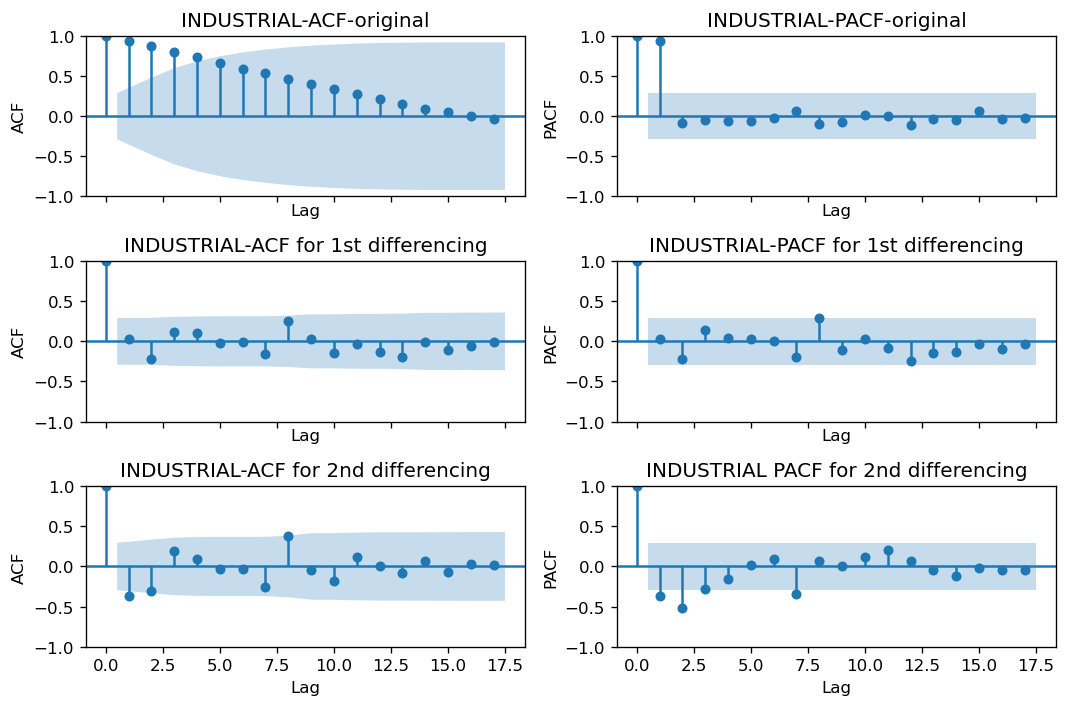

*************************************
RESIDENTIAL-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  0.213308
p-value                         0.972998
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
RESIDENTIAL-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -5.425666
p-value                         0.000003
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
RESIDENTIAL-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                -7.081189e+00
p-value                        4.661825e-10
#Lags Used                     2.000000e+00
Number of Observations Used    4.100000e+01
Critical 

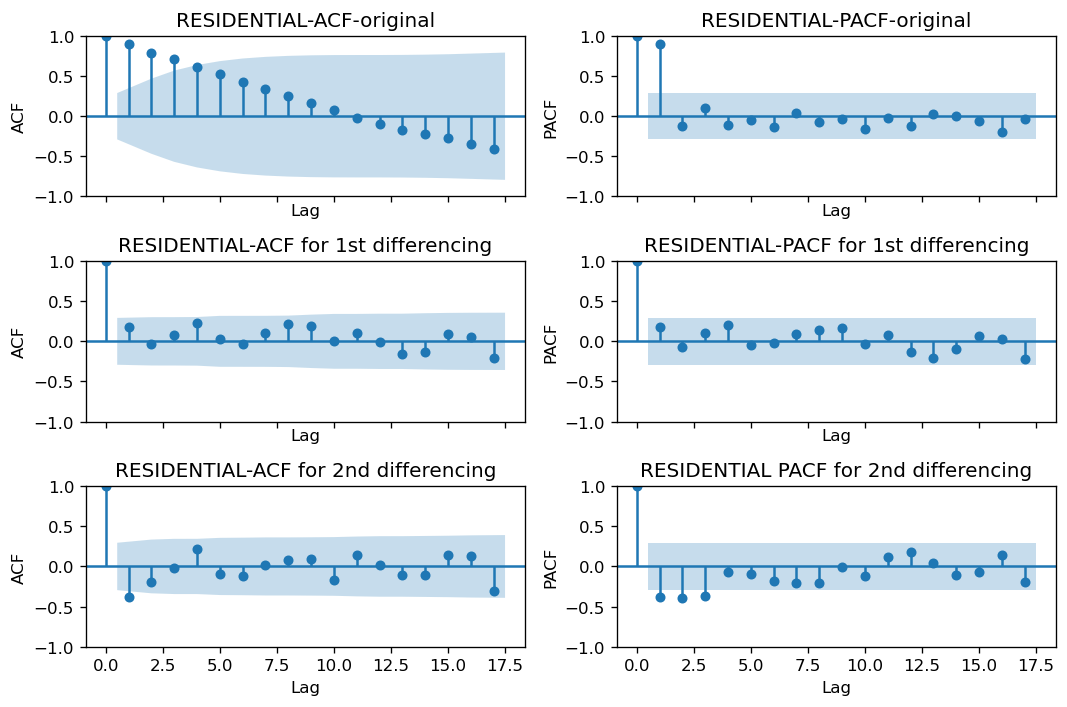

*************************************
COMMERCIAL, SERVICES, PUBLIC-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  2.752582
p-value                         1.000000
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
COMMERCIAL, SERVICES, PUBLIC-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -5.187659
p-value                         0.000009
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
COMMERCIAL, SERVICES, PUBLIC-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -5.083537
p-value                         0.000015
#Lags Used                      3.000000
Number of O

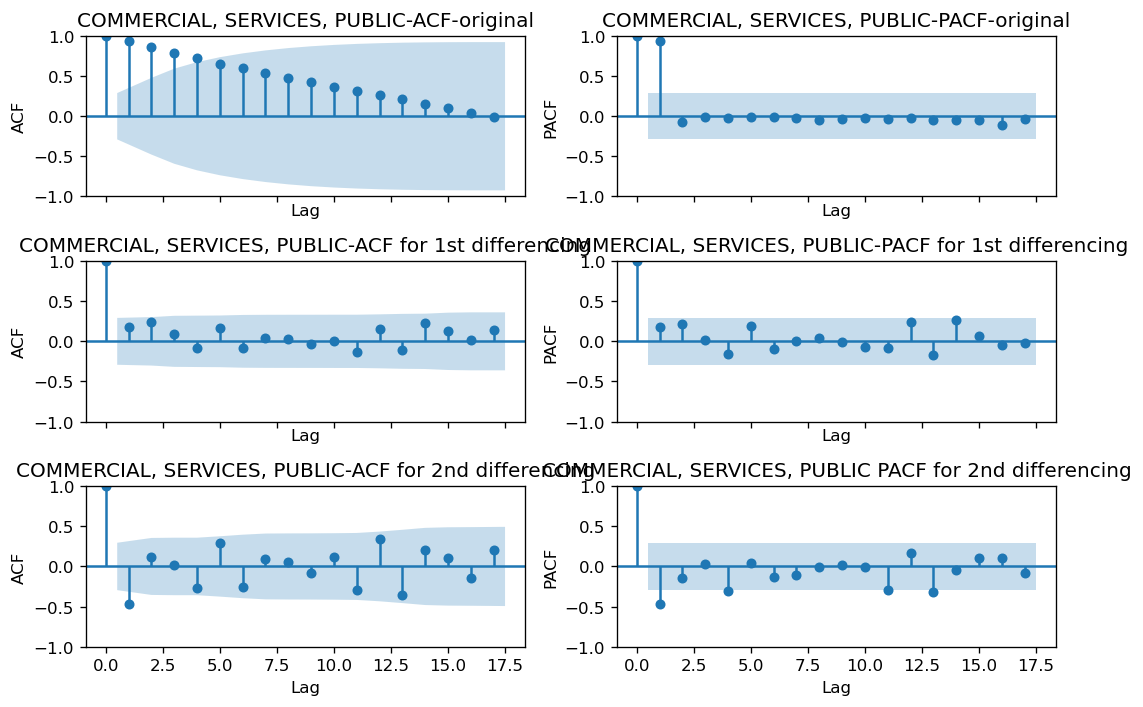

*************************************
AGRICULTURE, FISHING AND MINING-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  1.209344
p-value                         0.996050
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
AGRICULTURE, FISHING AND MINING-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                -6.949322e+00
p-value                        9.785090e-10
#Lags Used                     0.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64
AGRICULTURE, FISHING AND MINING-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                -6.809117e+00
p-value                        2.138701e-09
#Lags Used      

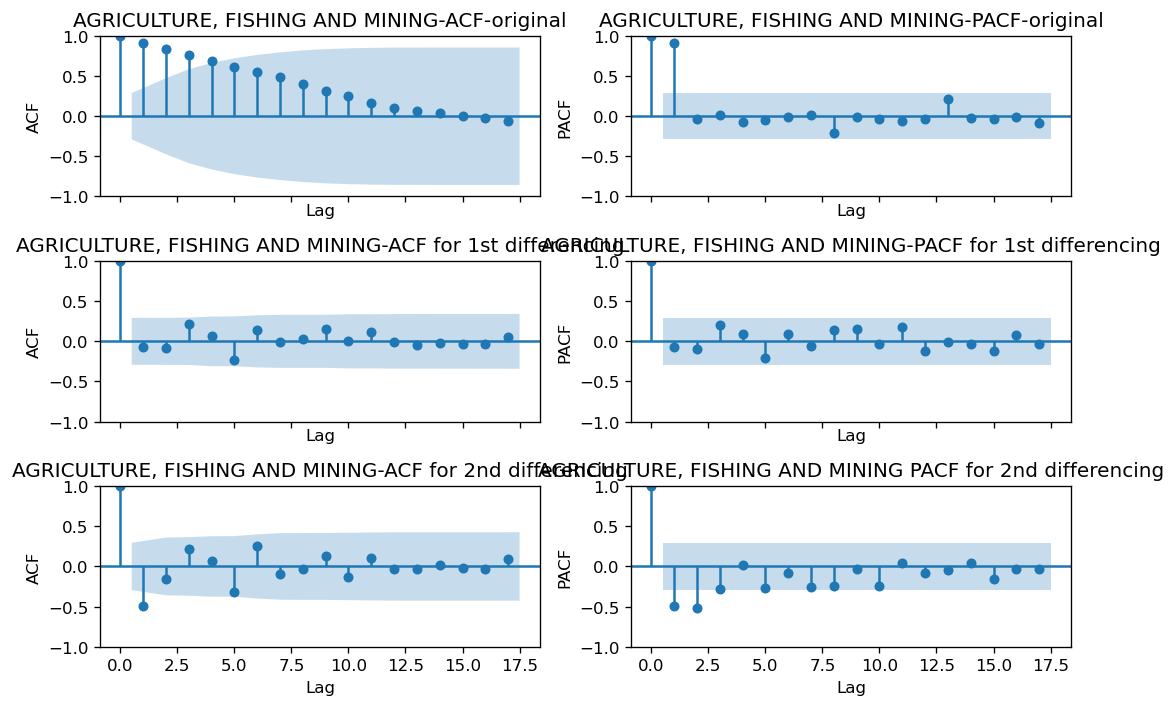

*************************************
CONSTRUCTION AND OTHERS-Test the original
Results of Dickey-Fuller Test:
Test Statistic                -5.910863e+00
p-value                        2.640907e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.500000e+01
Critical Value (1%)           -3.584829e+00
Critical Value (5%)           -2.928299e+00
Critical Value (10%)          -2.602344e+00
dtype: float64
CONSTRUCTION AND OTHERS-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                -5.843043e+00
p-value                        3.738493e-07
#Lags Used                     5.000000e+00
Number of Observations Used    3.900000e+01
Critical Value (1%)           -3.610400e+00
Critical Value (5%)           -2.939109e+00
Critical Value (10%)          -2.608063e+00
dtype: float64
CONSTRUCTION AND OTHERS-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -5.001523
p-value                         0.000022
#Lags Used               

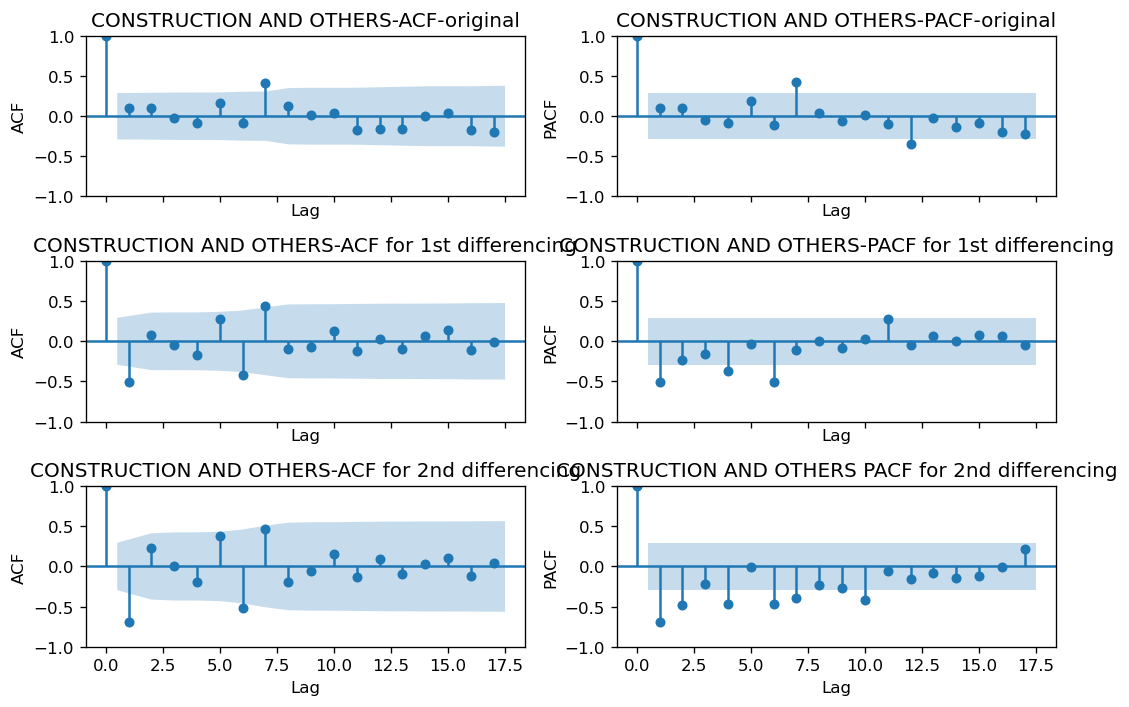

*************************************
NON-ENERGY CONSUMPTION-Test the original
Results of Dickey-Fuller Test:
Test Statistic                 -2.195579
p-value                         0.207854
#Lags Used                     10.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64
NON-ENERGY CONSUMPTION-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -2.172822
p-value                         0.216257
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64
NON-ENERGY CONSUMPTION-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -2.724450
p-value                         0.069902
#Lags Used                      9.000000
Number of Observations Used  

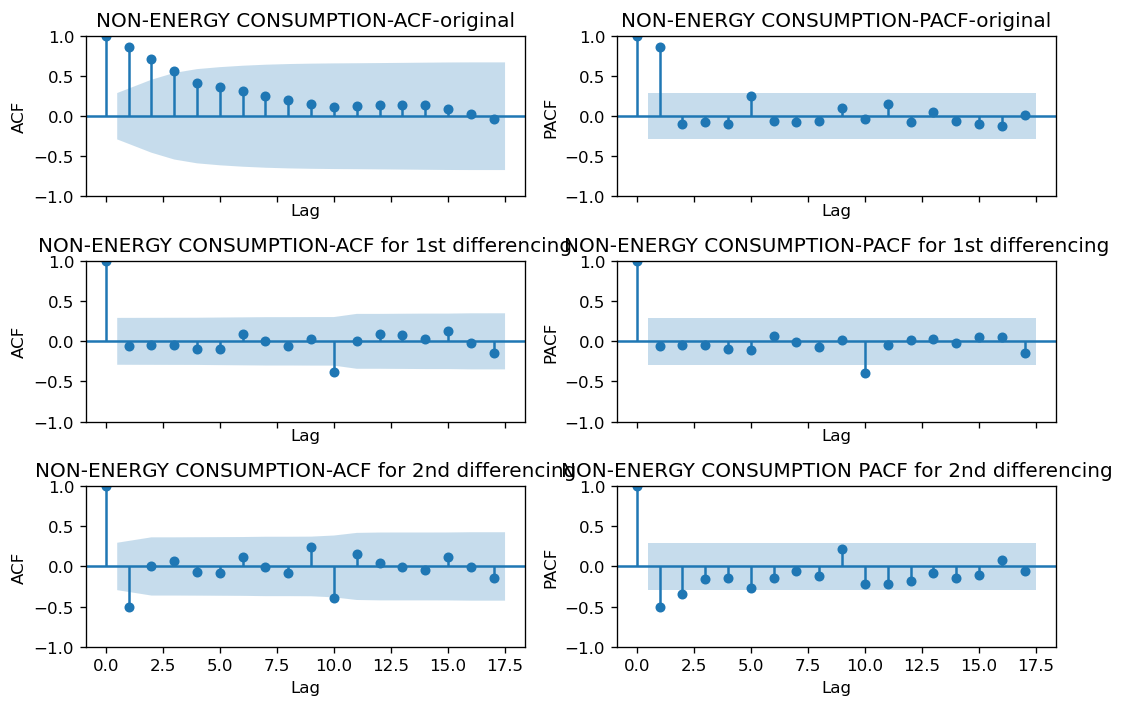

*************************************
FINAL CONSUMPTION-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  3.446750
p-value                         1.000000
#Lags Used                      9.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
FINAL CONSUMPTION-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -1.457273
p-value                         0.554532
#Lags Used                      8.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
FINAL CONSUMPTION-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -4.365760
p-value                         0.000341
#Lags Used                      6.000000
Number of Observations Used    37.000000
Cri

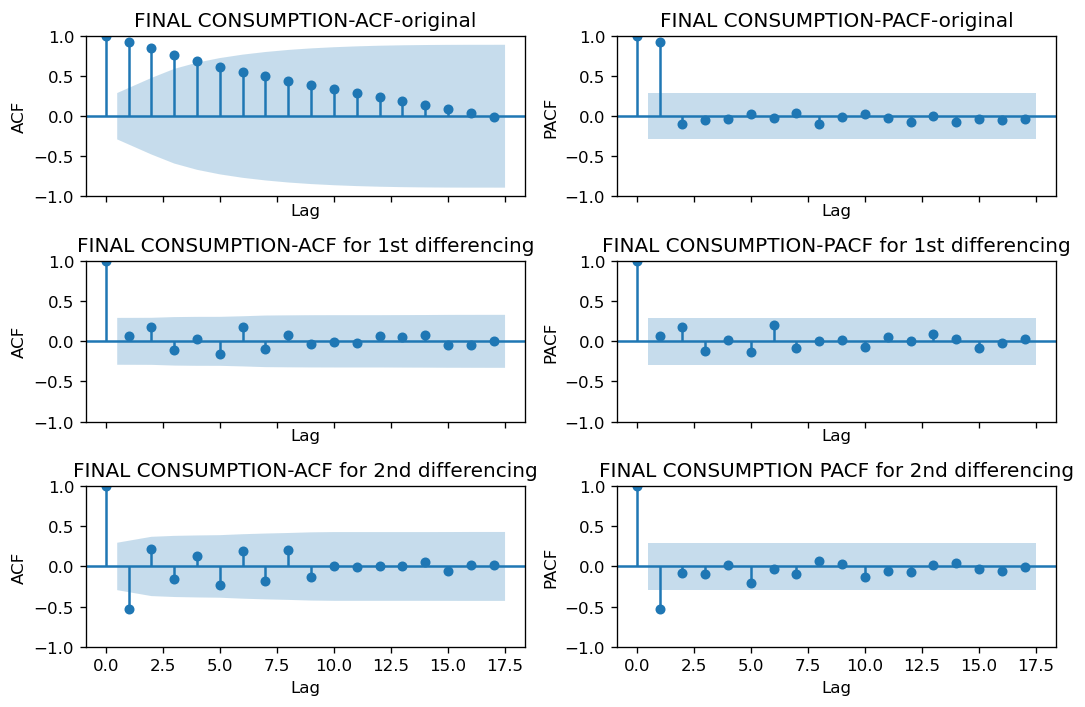

*************************************


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for s in scaled_df.columns:
    # Separate data (data used: scaled_df)
    
    train_size=int(len(df_C) * 0.90)
    df_tr=df_C[s].iloc[:train_size]#train[['TRANSPORT']]
    df_val=df_C[s].iloc[train_size:]
    
    # test stationary for the original data:
    print(f'{s}-Test the original')
    test_stationarity(df_tr)
    
    # Differencing 1st:
    train_diff = df_tr.diff().dropna()
    # Test stationary
    print(f'{s}-Test the 1st')
    test_stationarity(train_diff)
    # Differencing 2nd:
    train_diff_2=df_tr.diff().diff().dropna()
    # Test starionary
    print(f'{s}-Test the 2nd')
    test_stationarity(train_diff_2)
    
    plt.rcParams.update({'figure.figsize': (9, 6), 'figure.dpi': 120})

    fig, axes = plt.subplots(3, 2, sharex=True)

    # Plot ACF for original data
    plot_acf(df_tr, ax=axes[0, 0])
    axes[0, 0].set_title(f'{s}-ACF-original')
    axes[0, 0].set_xlabel('Lag')
    axes[0, 0].set_ylabel('ACF')

    # Plot PACF for train
    plot_pacf(df_tr, ax=axes[0, 1], method='ywm')
    axes[0, 1].set_title(f'{s}-PACF-original')
    axes[0, 1].set_xlabel('Lag')
    axes[0, 1].set_ylabel('PACF')


    # Plot ACF for train_diff
    plot_acf(train_diff, ax=axes[1, 0])
    axes[1, 0].set_title(f'{s}-ACF for 1st differencing')
    axes[1, 0].set_xlabel('Lag')
    axes[1, 0].set_ylabel('ACF')

    # Plot PACF for train_diff
    plot_pacf(train_diff, ax=axes[1, 1], method='ywm')
    axes[1, 1].set_title(f'{s}-PACF for 1st differencing')
    axes[1, 1].set_xlabel('Lag')
    axes[1, 1].set_ylabel('PACF')

    # Plot ACF for train_diff_2
    plot_acf(train_diff_2, ax=axes[2, 0])
    axes[2, 0].set_title(f'{s}-ACF for 2nd differencing')
    axes[2, 0].set_xlabel('Lag')
    axes[2, 0].set_ylabel('ACF')

    # Plot PACF for train_diff_2
    plot_pacf(train_diff_2, ax=axes[2, 1], method='ywm')
    axes[2, 1].set_title(f'{s} PACF for 2nd differencing')
    axes[2, 1].set_xlabel('Lag')
    axes[2, 1].set_ylabel('PACF')

    plt.tight_layout()
    plt.show()
    
    
    print(f'*************************************')

### b. Step 2: Find the best (p,q) manually
This step is optional, as **p** and **q** can also be selected by finding the minimum values of AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) if **d** is already determined.

In [29]:
import statsmodels.api as sm
def order_aic_bic(df,d):
    order_aic_bic =[]

    # Loop over p values from 0-4
    for p in range(5):
        # Loop over q values from 0-4
        for q in range(5):

            try:
                # create and fit ARMA(p,q) model
                
                model = ARIMA(df, order=(p, d, q))#,initialization='approximate_diffuse')
                results = model.fit()#maxiter=1000

                # Print order and results
                order_aic_bic.append((p, q, results.aic, results.bic))            
            except:
                print(p, q, None, None)

    # Make DataFrame of model order and AIC/BIC scores
    order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

    # lets sort them by AIC and BIC

    # Sort by AIC
    print("Models sorted by AIC ")
    #print("\n")
    print(order_df.sort_values('aic').reset_index(drop=True)[:5])

    # Sort by BIC
    print("Models sorted by BIC ")
    #print("\n")
    print(order_df.sort_values('bic').reset_index(drop=True)[:5])

### Sample check for all sectors

In [30]:
import warnings

# Set the warning filter to 'ignore' to suppress all warnings
warnings.filterwarnings("ignore")

In [31]:

for s in scaled_df.columns:
    
    # prepare data:
    # Separate size of data   
    train_size=int(len(df_C) * 0.9) 
    df_sector= df_C[[s]]
    #df_sector.index = pd.to_datetime(df_sector.index, format='%Y')
    # Convert index to datetime format
    df_sector.index = pd.to_datetime(df_sector.index, format='%Y')
    
    # Set the frequency to 'AS' (Annual Start)
    df_sector = df_sector.asfreq('AS')
    # Train and Validate
    df_tr=df_sector.iloc[:train_size]
    df_val=df_sector.iloc[train_size:]
       
    if s=='TRANSPORT':
        print(s)
        d=2
        order_aic_bic(df_tr,d)
        print('****************')
           
        
    if s=='INDUSTRIAL':
        print(s)
        d=1
        order_aic_bic(df_tr,d)
        print('****************')
        
    if s=='RESIDENTIAL':
        print(s)
        d=2
        order_aic_bic(df_tr,d)
        print('****************')
        
    if s=='COMMERCIAL, SERVICES, PUBLIC':
        print(s)
        d=1
        order_aic_bic(df_tr,d)
        print('****************')
         
    if s=='AGRICULTURE, FISHING AND MINING':
        print(s)
        d=1
        order_aic_bic(df_tr,d)
        print('****************')
       
    if s=='CONSTRUCTION AND OTHERS':
        print(s)
        d=0
        order_aic_bic(df_tr,d)
        print('****************')
        
    if s=='NON-ENERGY CONSUMPTION':
        print(s)
        d=2
        order_aic_bic(df_tr,d)
        print('****************')
        
    if s=='FINAL CONSUMPTION':
        print(s)
        d=2
        order_aic_bic(df_tr,d)

      

TRANSPORT
Models sorted by AIC 
   p  q         aic         bic
0  0  1  187.039854  190.608233
1  1  1  187.865094  193.217663
2  4  4  188.152777  204.210483
3  4  3  188.194581  202.468098
4  0  2  188.305524  193.658093
Models sorted by BIC 
   p  q         aic         bic
0  0  1  187.039854  190.608233
1  1  1  187.865094  193.217663
2  0  2  188.305524  193.658093
3  1  0  191.497899  195.066279
4  2  0  189.793445  195.146014
****************
INDUSTRIAL
Models sorted by AIC 
   p  q         aic         bic
0  1  1  209.745233  215.165220
1  2  4  209.916304  222.562941
2  3  1  210.482646  219.515958
3  1  3  210.487195  219.520507
4  2  3  210.725247  221.565222
Models sorted by BIC 
   p  q         aic         bic
0  1  1  209.745233  215.165220
1  1  0  214.527799  218.141124
2  0  1  214.638512  218.251837
3  1  2  211.526131  218.752781
4  3  0  211.830525  219.057175
****************
RESIDENTIAL
Models sorted by AIC 
   p  q        aic        bic
0  0  1  71.537765  75.10

### c. Generate the model and predict

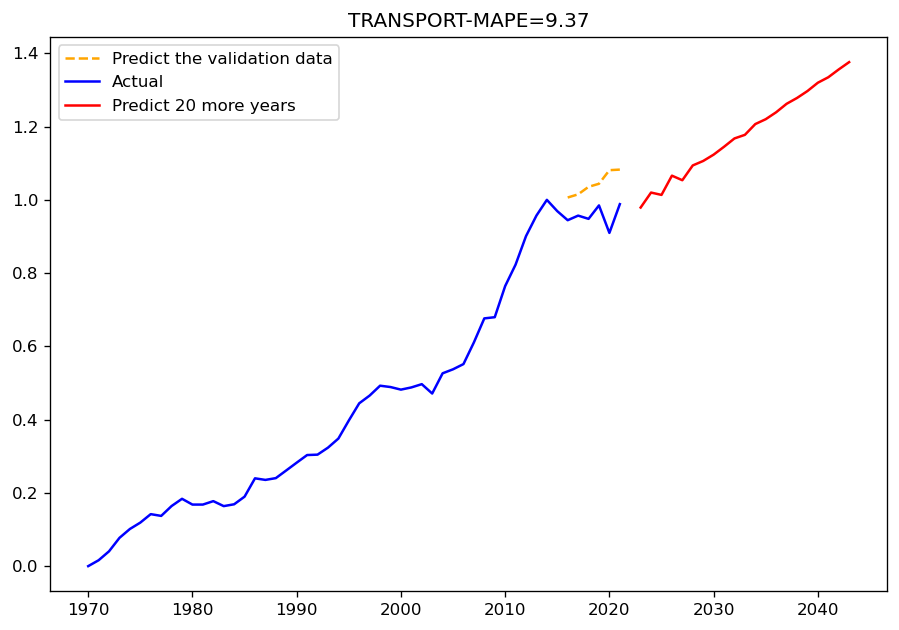

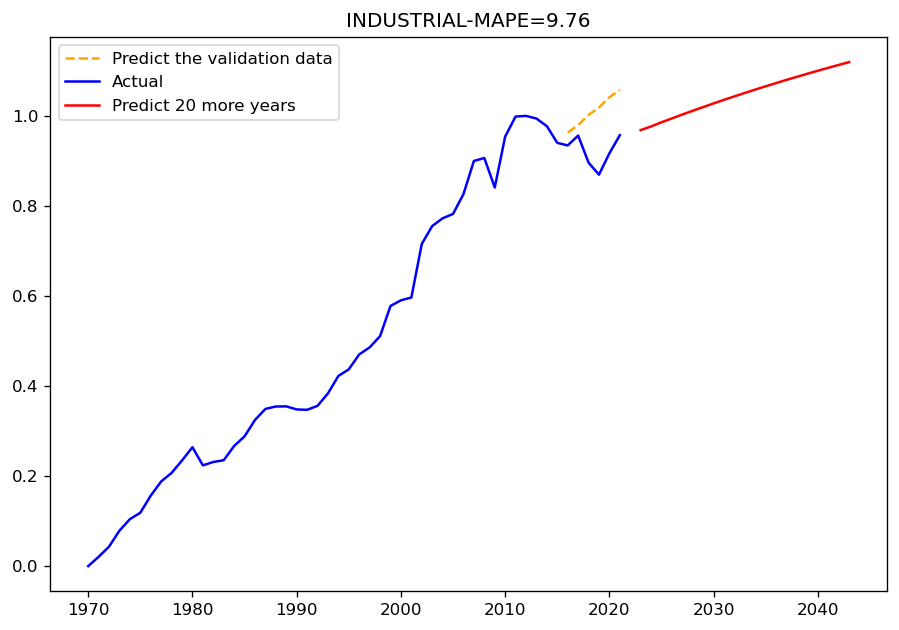

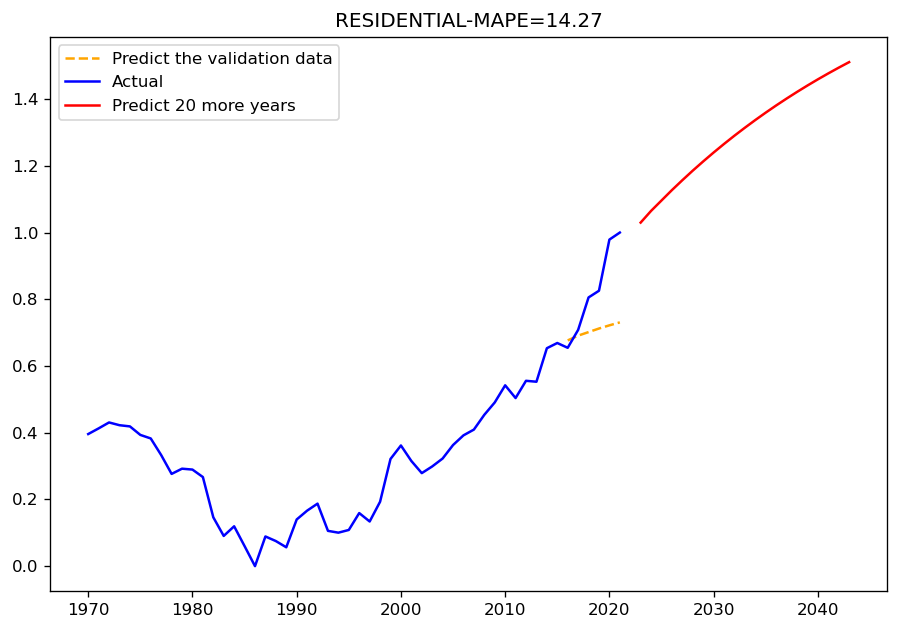

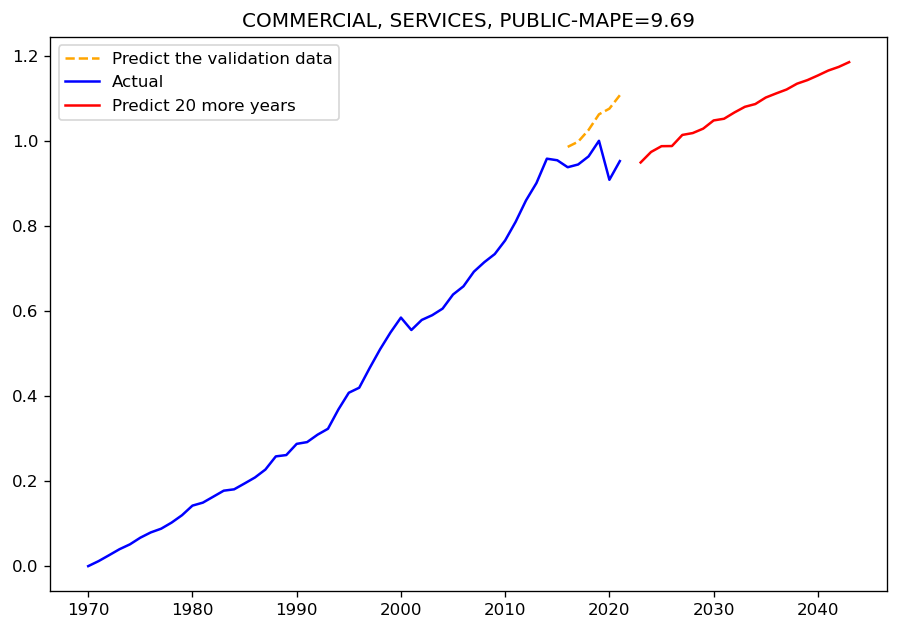

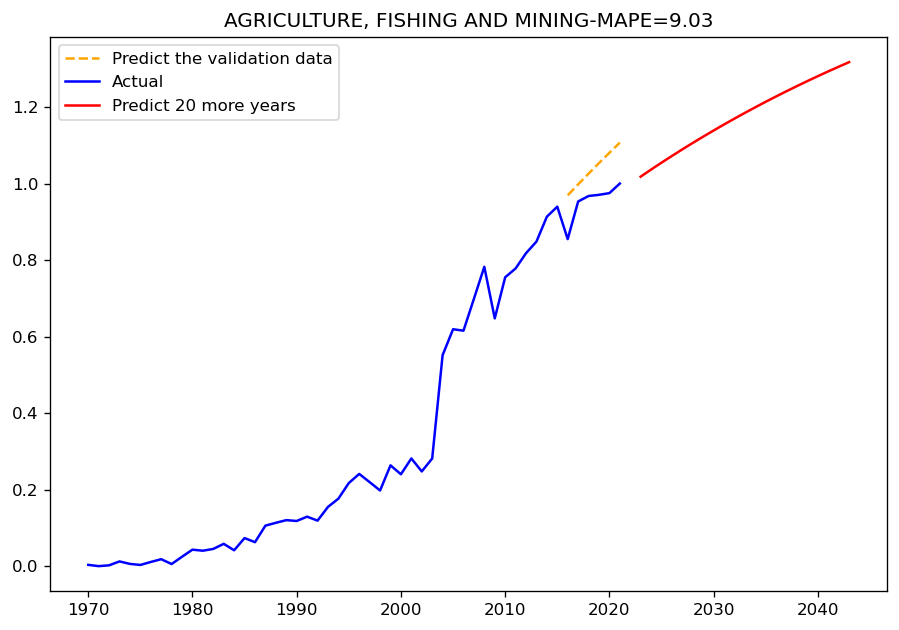

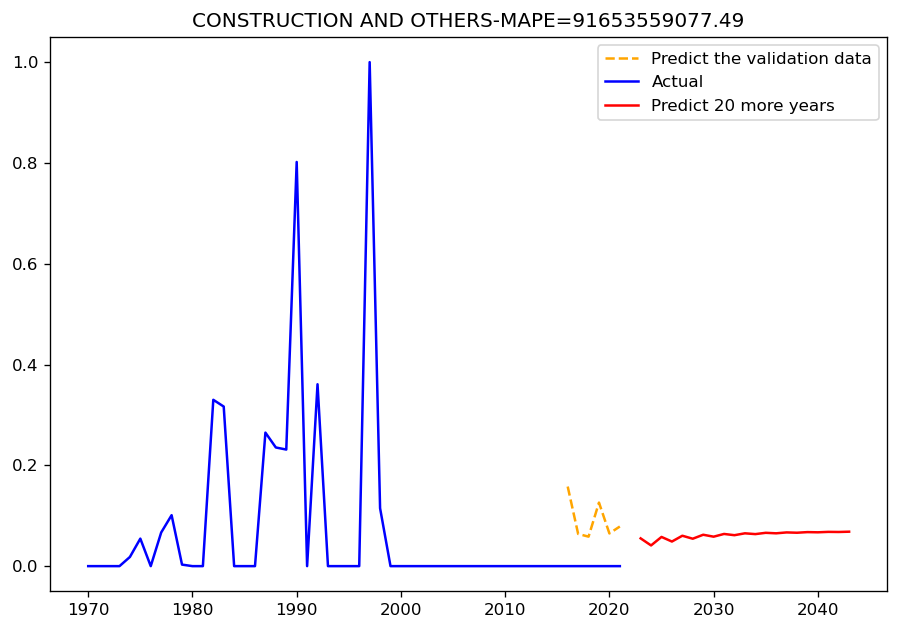

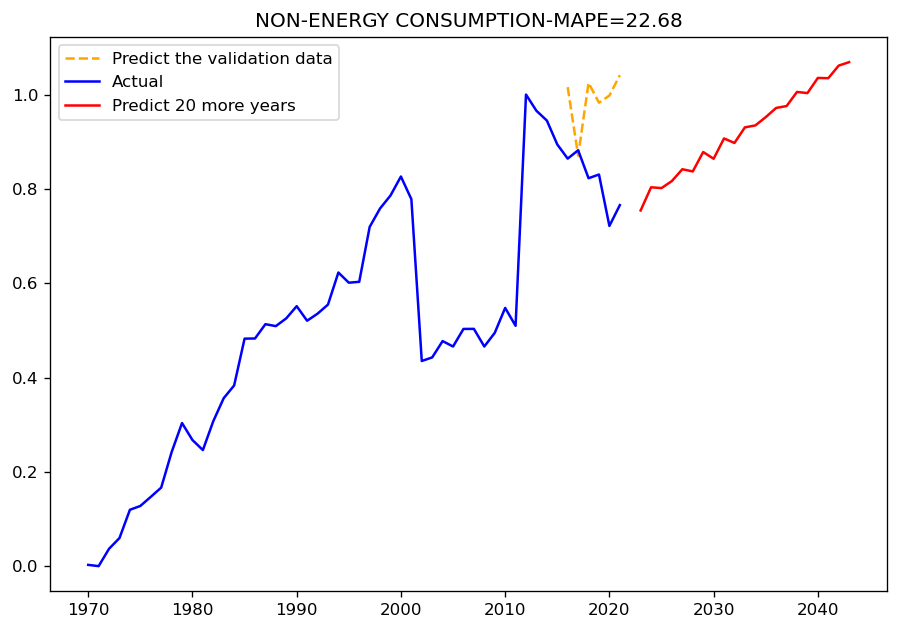

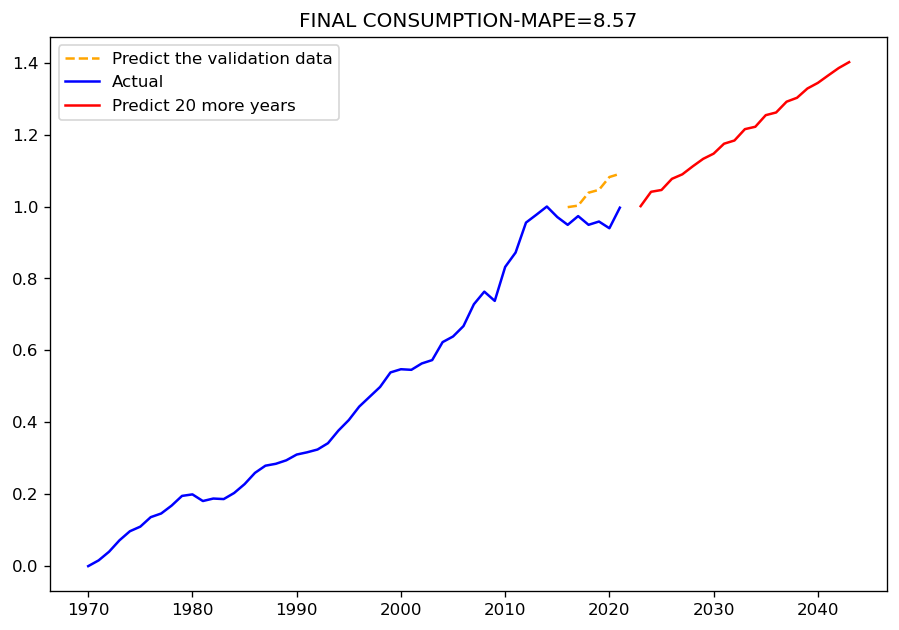

In [32]:

df_C_pred=pd.DataFrame()
for s in scaled_df.columns:
    
    # prepare data:
    # Separate size of data   
    train_size=int(len(scaled_df) * 0.9) 
    df_sector= scaled_df[[s]]
    df_sector.index = pd.to_datetime(df_sector.index, format='%Y')
    # Train and Validate
    df_tr=df_sector.iloc[:train_size]
    df_val=df_sector.iloc[train_size:]
       
    
    # Build model ARIMA with order=(1,1,1) or (2,1,1)
    ## We can select model here for each sector by including the condition....
    
    # Build model ARIMA with oder chose manually
    if s=='TRANSPORT':
        model_val=ARIMA(df_tr, order=(4,2,3))# or maybe (4,2,3)
        model = ARIMA(df_sector, order=(4,2,3))# or maybe (4,2,3)
    if s=='INDUSTRIAL':
        model_val = ARIMA(df_tr, order=(2,1,2))
        model = ARIMA(df_sector, order=(2,1,2))
    if s=='RESIDENTIAL':
        model_val = ARIMA(df_tr, order=(2,1,2)) # or maybe (3,1,2)
        model = ARIMA(df_sector, order=(2,1,2)) # or maybe (3,1,2)
    if s=='COMMERCIAL, SERVICES, PUBLIC':
        model_val = ARIMA(df_tr, order=(4,1,4))
        model = ARIMA(df_sector, order=(4,1,4))       
    if s=='AGRICULTURE, FISHING AND MINING':
        model_val = ARIMA(df_tr, order=(2,1,1))
        model = ARIMA(df_sector, order=(2,1,1))
    if s=='CONSTRUCTION AND OTHERS':
        model_val = ARIMA(df_tr, order=(2,0,2))
        model = ARIMA(df_sector, order=(2,0,2))
    if s=='NON-ENERGY CONSUMPTION':
        model_val = ARIMA(df_tr, order=(4,2,3))
        model = ARIMA(df_sector, order=(4,2,3))
    if s=='FINAL CONSUMPTION':
        model_val = ARIMA(df_tr, order=(3,2,3))
        model = ARIMA(df_sector, order=(3,2,3))
    
    model_val_fit=model_val.fit()
    model_fit = model.fit()
    
    
    # Validation:
    
    forecast_val = model_val_fit.predict(start=df_val.index[0], end=df_val.index[-1])

    # Create a Pandas DataFrame with the forecasted values and set the index
    df_forecast_val = pd.DataFrame(data=forecast_val, index=df_val.index)

    mape_val=MAPE(df_val, df_forecast_val)
    # Plot

    #plt.plot(df_sector, "b", label= "Actual")
    plt.plot(df_forecast_val, "orange", linestyle="--", label="Predict the validation data")
    

    #Predict:
    
    # Specify the number of future steps to forecast
    periods = 20  # Adjust as needed
    
    # Specify the start date
    start_date = pd.to_datetime('2022-01-01')

    # Prediction for future time points
    data_pred = model_fit.predict(start=start_date, end=start_date+ pd.DateOffset(years=periods))

    # Create a date range for the forecasted period
    forecast_index = pd.date_range(start=start_date, periods=periods+1, freq='A')

    # Create a Pandas DataFrame with the forecasted values and set the index
    df_forecast = pd.DataFrame(data=list(data_pred), index=forecast_index, columns=[s])

    # Plot
    plt.plot(df_sector, "b", label="Actual")
    plt.plot(df_forecast, "r", label="Predict 20 more years")

    #plt.title(f"{s}")
    plt.title(f'{s}-MAPE={mape_val}')
    plt.legend()
    plt.show()
    
    #Concatenate df
    df_C_pred=pd.concat([df_C_pred,df_forecast],axis=1)
# Round the values of each column in the dataframe with 2 decimals
df_C_pred = df_C_pred.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)  
df_C_pred.index=df_C_pred.index.year
# Save the df_forecast to excel
file_name='df_C_pred.xlsx'
df_C_pred.to_excel(file_name)

In [33]:
df_C_final=pd.concat([scaled_df, df_C_pred], axis=0)

In [34]:
df_C_final.index=df_C_final.index.astype(int)

# Invert the scaled values in your DataFrame back to the original data
df_C_final = pd.DataFrame(scaler.inverse_transform(df_C_final), columns=df_C_final.columns, index=df_C_final.index)
df_C_final=df_C_final.drop("FINAL CONSUMPTION", axis=1)


In [35]:
df_tot = df_C_final.sum(axis=1)
df_C_final['TOT']=df_tot



<AxesSubplot:title={'center':'Prediction FINAL ENERGY CONSUMPTION 20 more years'}, xlabel='Year', ylabel='Values [Mtoe]'>

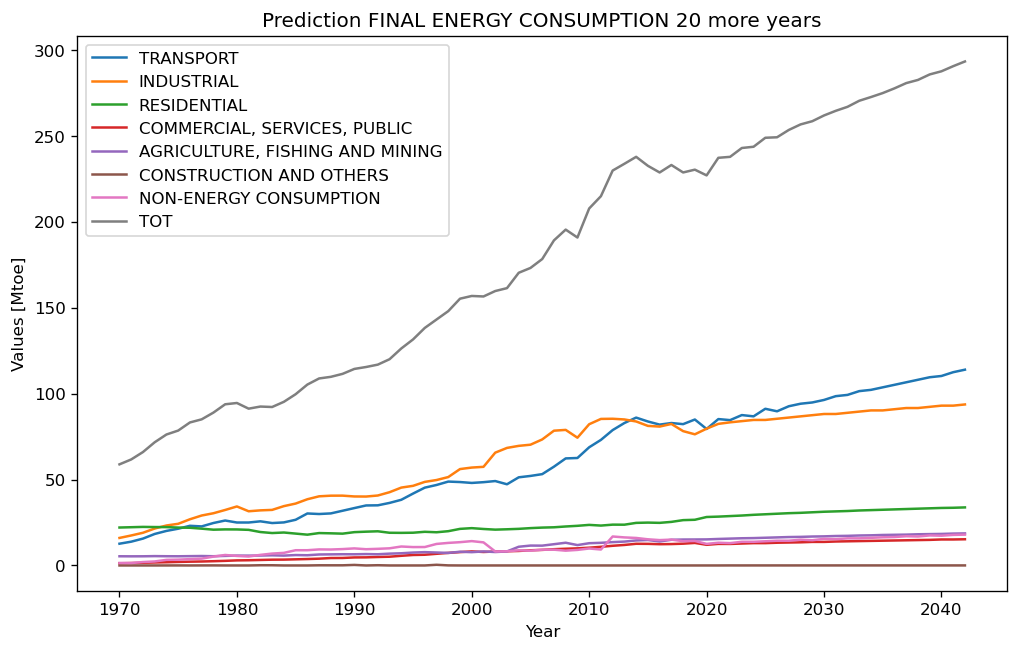

In [36]:
df_C_final.plot(figsize=(10, 6),title= "Prediction FINAL ENERGY CONSUMPTION 20 more years", xlabel= "Year", ylabel="Values [Mtoe]")

In [37]:
df_C_final=df_C_final.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x) 

In [38]:
df_C_final_percentages = (df_C_final.drop(columns=['TOT']).div(df_C_final['TOT'], axis=0) * 100)

In [39]:
df_C_final_stackplot=df_C_final.drop(columns=['TOT'])

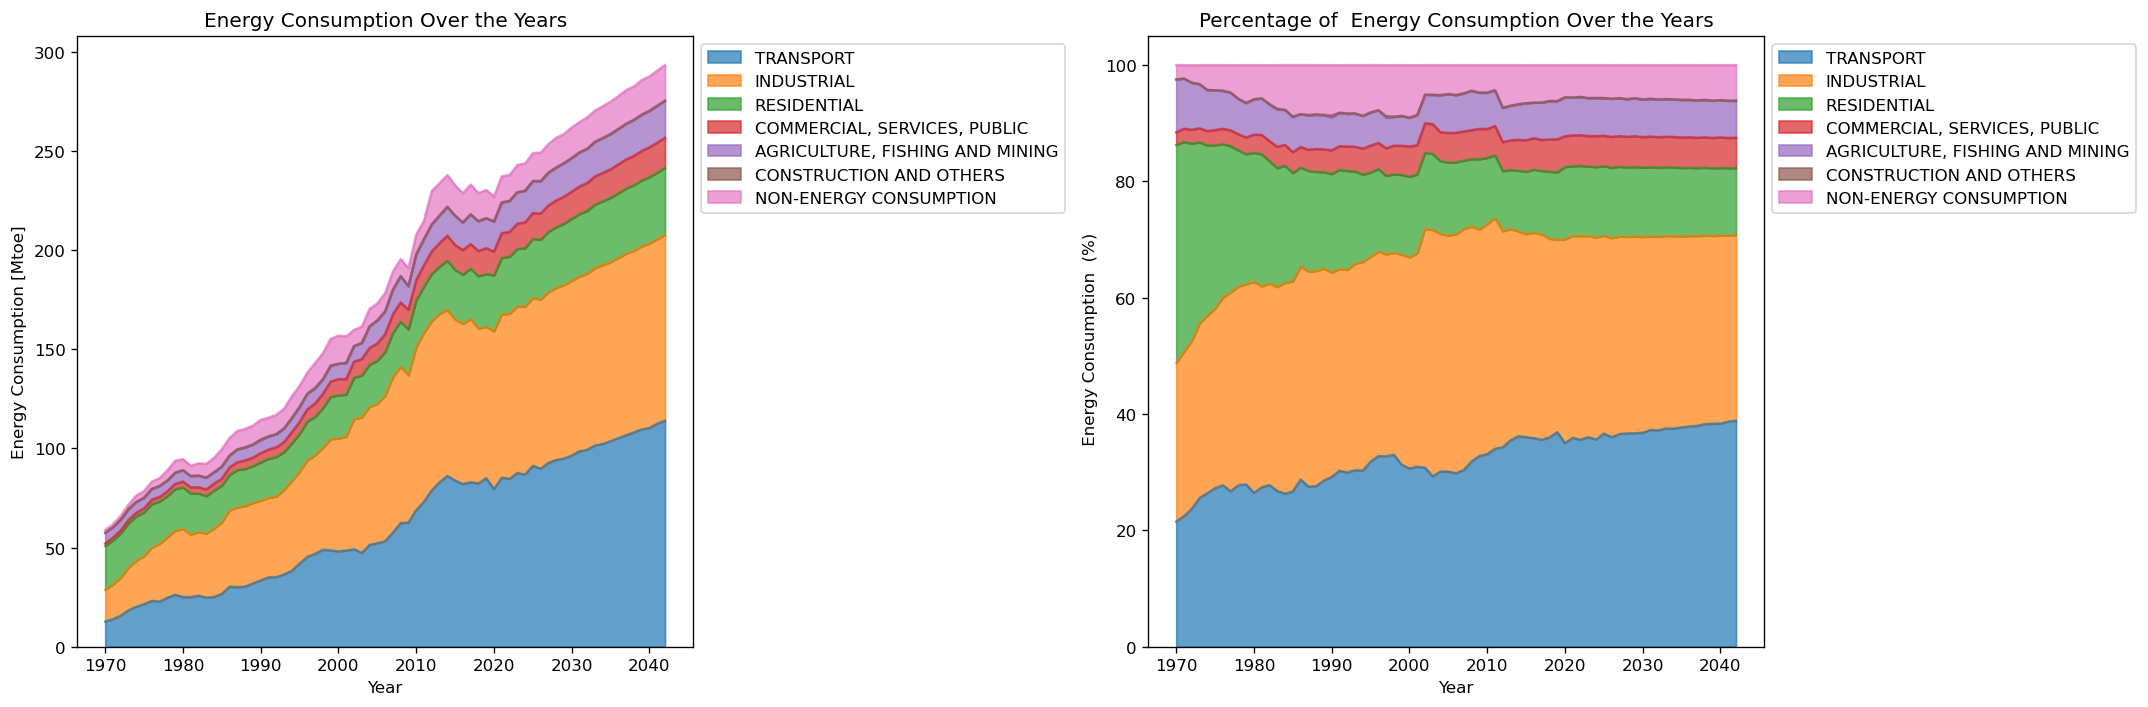

In [40]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))

df_C_final_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption [Mtoe]')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_C_final_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

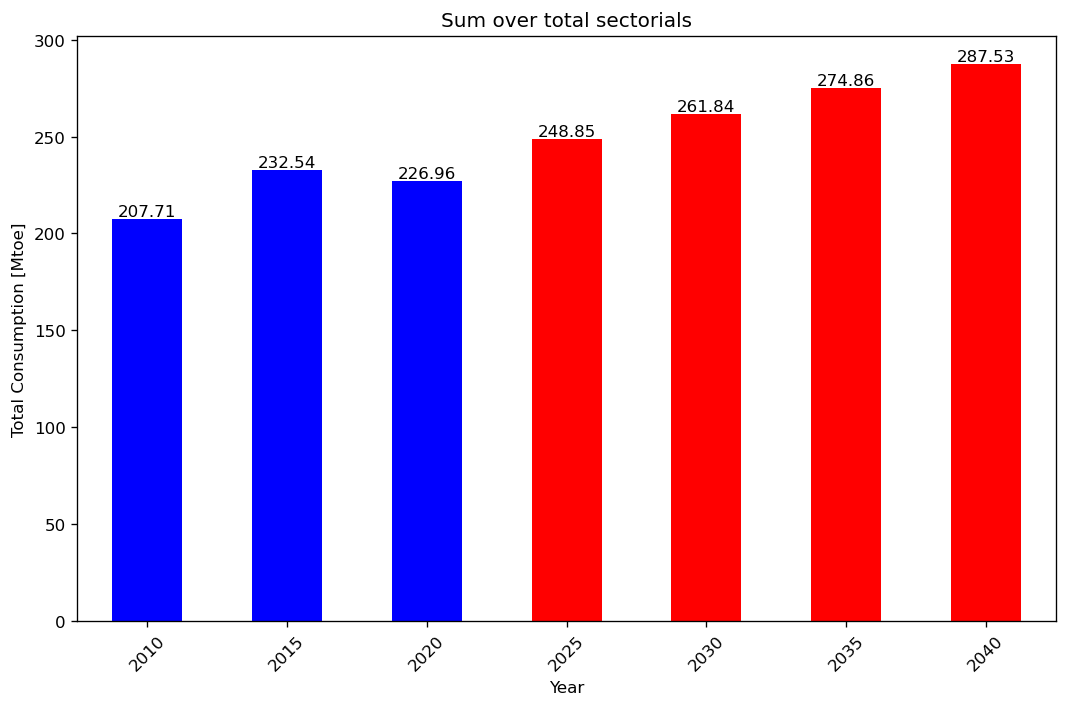

In [41]:
# Filter the DataFrame to include only data for every 5 years
filtered_df = df_C_final[df_C_final.index % 5 == 0]
# Create a bar plot
ax = filtered_df['TOT'][8:].plot(x='Year', y='TOT', kind='bar', color=['b']* (len(filtered_df)-(8+4))  + ['r']*4 )

# Add value annotations to the bars
for index, value in enumerate(filtered_df['TOT'][8:]):
    ax.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Total Consumption [Mtoe]')
plt.title('Sum over total sectorials')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [42]:
# Check the value in a given year:
year=2028
value=df_C_final.loc[year,'TOT']
print(f'Total consumption in year  {year} is {value}')

Total consumption in year  2028 is 256.61


 **Copare with the result in Website: eneroutlook**
 
 https://eneroutlook.enerdata.net/brazil-energy-forecast.html
 
 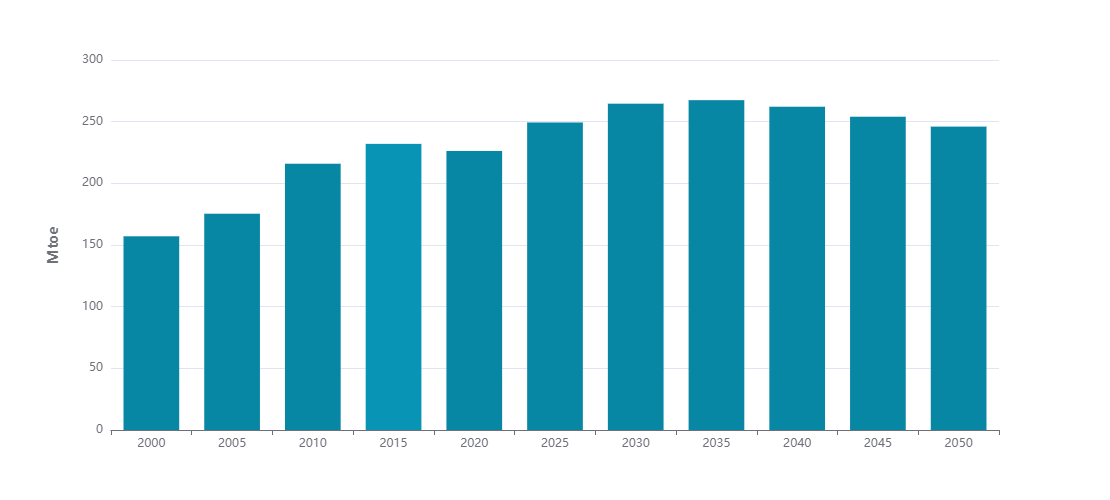
 

# III. Scenarios:

In [43]:
df_concat.columns


Index(['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL'],
      dtype='object')

In [44]:
final_consumption_data = df_concat[df_concat['SECTOR'] == 'FINAL CONSUMPTION']
final_consumption_data=final_consumption_data.drop(columns=['SECTOR'])
final_consumption_data.columns

Index(['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR',
       'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL'],
      dtype='object')

In [45]:
final_consumption_data.head()

OIL  NATURAL GAS     COAL  HYDROENERGY  GEOTHERMAL  NUCLEAR  FIREWOOD  \
YEAR                                                                          
1970  NaN      0.00632  0.08224          NaN         NaN      NaN  28.34498   
1971  NaN      0.03079  0.08707          NaN         NaN      NaN  27.81478   
1972  NaN      0.06811  0.08810          NaN         NaN      NaN  27.51668   
1973  NaN      0.09330  0.07018          NaN         NaN      NaN  26.98772   
1974  NaN      0.22764  0.09930          NaN         NaN      NaN  26.47921   

      SUGARCANE AND PRODUCTS  OTHER PRIMARY  TOTAL PRIMARIES  ...  \
YEAR                                                          ...   
1970                 3.05959        0.14209         31.63521  ...   
1971                 3.28909        0.15295         31.37467  ...   
1972                 3.71635        0.20727         31.59650  ...   
1973                 4.02993        0.22213         31.40326  ...   
1974                 4.02503        0.25387         31.08505  ...   

      KEROSENE/JET FUEL  DIESEL OIL  FUEL OIL     COKE  CHARCOAL    GASES  \
YEAR                                                                        
1970            1.13763     5.33683   5.71424      NaN   1.58982  0.29606   
1971            1.23178     5.91466   6.80591      NaN   1.81066  0.30870   
1972            1.35870     6.76856   7.44103      NaN   2.09866  0.32540   
1973            1.56671     8.02625   9.18071  0.01931   2.22716  0.35591   
1974            1.68211     8.89986  10.54023  0.02069   2.77733  0.36227   

      OTHER SECONDARY  NON-ENERGY  TOTAL SECUNDARIES     TOTAL  
YEAR                                                            
1970          0.10519     1.20177           27.19890  58.83412  
1971          0.12487     1.17362           30.31701  61.69169  
1972          0.13942     1.23857           34.39862  65.99512  
1973          0.15482     1.23857           40.28960  71.69286  
1974          0.16069     2.00212           45.11335  76.19840  

[5 rows x 23 columns]

In [52]:
# Clasify the energy sources:

group_CARBON=['COAL','FIREWOOD','COKE','CHARCOAL']

group_PETROLIUM= ['OIL','GASOLINE/ALCOHOL','KEROSENE/JET FUEL','DIESEL OIL','FUEL OIL']

group_NATURAL_GAS=['NATURAL GAS','LPG','GASES']

group_RENEWABLE=['HYDROENERGY','GEOTHERMAL','SUGARCANE AND PRODUCTS']

group_ELECTRICITY= ['ELECTRICITY']

group_NUCLEAR=['NUCLEAR']

group_OTHER=['OTHER PRIMARY','OTHER SECONDARY','NON-ENERGY']

In [57]:
df_group=pd.DataFrame()

df_group['group_CARBON']=final_consumption_data[group_CARBON].sum(axis=1)
df_group['group_PETROLIUM']=final_consumption_data[group_PETROLIUM].sum(axis=1)
df_group['group_NATURAL_GAS']=final_consumption_data[group_NATURAL_GAS].sum(axis=1)
df_group['group_ELECTRICITY']=final_consumption_data[group_ELECTRICITY]
df_group['group_RENEWABLE']=final_consumption_data[group_RENEWABLE].sum(axis=1)
df_group['group_NUCLEAR']=final_consumption_data['NUCLEAR']
df_group['group_OTHER']=final_consumption_data[group_OTHER].sum(axis=1)

<AxesSubplot:xlabel='YEAR'>

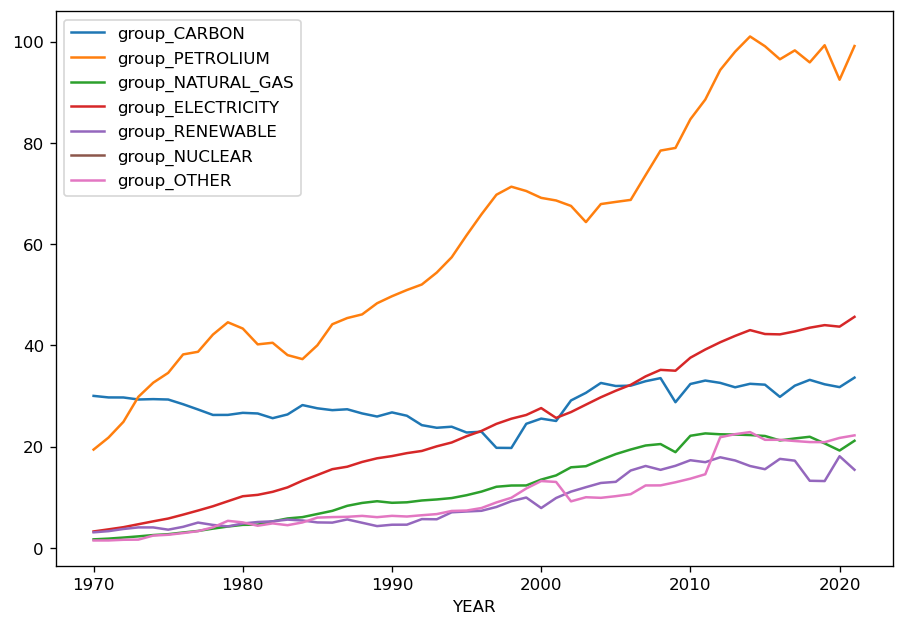

In [58]:
df_group.plot()

In [69]:
df_group.columns

Index(['group_CARBON', 'group_PETROLIUM', 'group_NATURAL_GAS',
       'group_ELECTRICITY', 'group_RENEWABLE', 'group_NUCLEAR', 'group_OTHER',
       'TOTAL'],
      dtype='object')

In [63]:
df_group_percentages = df_group.div(df_group.sum(axis=1) ,axis=0) * 100
df_group_percentages['TOTAL']=100
df_group_percentages = df_group_percentages.round(0)

In [64]:
df_group['TOTAL']=final_consumption_data[['TOTAL']]
# Round the values of each column in the dataframe with 2 decimals
df_group = df_group.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)


In [67]:
# Initializing an empty DataFrame for the final combined table
final_df = pd.DataFrame()

# Iterating through each column in the original dataframe
for col in df_group.columns:
    # Constructing the paired data for 'Value' and 'Percentage'
    paired_data = pd.concat([df_group[col], df_group_percentages[col]], axis=1)
    paired_data.columns = pd.MultiIndex.from_product([[col], ['[Mtoe]', '%']])
    # Adding the paired data to the final dataframe
    final_df = pd.concat([final_df, paired_data.round(2)], axis=1)

final_df.tail(10)


group_CARBON      group_PETROLIUM       group_NATURAL_GAS       \
           [Mtoe]    %          [Mtoe]     %            [Mtoe]    %   
YEAR                                                                  
2012        32.59  7.0           94.41  21.0             22.43  5.0   
2013        31.71  7.0           98.04  21.0             22.38  5.0   
2014        32.41  7.0          101.04  21.0             22.28  5.0   
2015        32.23  7.0           99.11  21.0             22.09  5.0   
2016        29.82  7.0           96.53  21.0             21.22  5.0   
2017        32.04  7.0           98.29  21.0             21.61  5.0   
2018        33.18  7.0           95.91  21.0             21.94  5.0   
2019        32.31  7.0           99.31  22.0             20.62  4.0   
2020        31.75  7.0           92.49  20.0             19.22  4.0   
2021        33.63  7.0           99.15  21.0             21.15  4.0   

     group_ELECTRICITY       group_RENEWABLE      group_NUCLEAR      \
                [Mtoe]     %          [Mtoe]    %        [Mtoe]   %   
YEAR                                                                  
2012             40.62   9.0           17.89  4.0           NaN NaN   
2013             41.87   9.0           17.25  4.0           NaN NaN   
2014             43.02   9.0           16.16  3.0           NaN NaN   
2015             42.24   9.0           15.53  3.0           NaN NaN   
2016             42.17   9.0           17.57  4.0           NaN NaN   
2017             42.76   9.0           17.22  4.0           NaN NaN   
2018             43.49  10.0           13.25  3.0           NaN NaN   
2019             44.00  10.0           13.19  3.0           NaN NaN   
2020             43.70  10.0           18.09  4.0           NaN NaN   
2021             45.63  10.0           15.42  3.0           NaN NaN   

     group_OTHER        TOTAL       
          [Mtoe]    %  [Mtoe]    %  
YEAR                                
2012       21.84  5.0  229.77  100  
2013       22.45  5.0  233.71  100  
2014       22.86  5.0  237.76  100  
2015       21.34  5.0  232.54  100  
2016       21.34  5.0  228.65  100  
2017       21.10  5.0  233.00  100  
2018       20.89  5.0  228.67  100  
2019       20.87  5.0  230.30  100  
2020       21.71  5.0  226.96  100  
2021       22.22  5.0  237.19  100

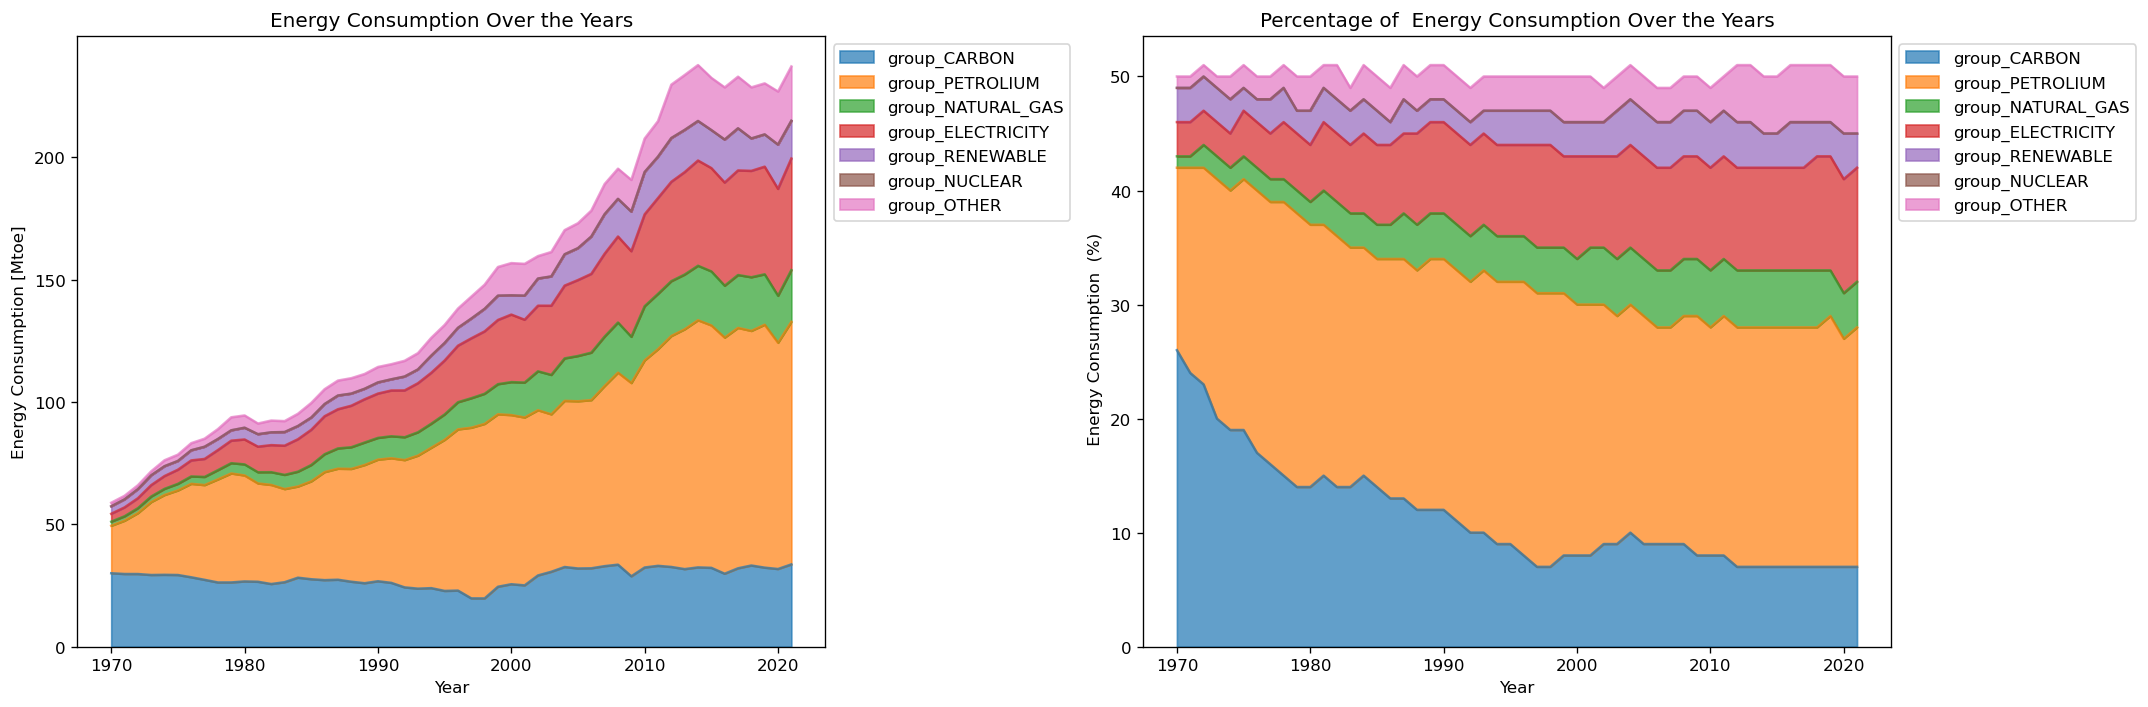

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))

df_group.drop(columns=['TOTAL']).plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption [Mtoe]')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_group_percentages.drop(columns=['TOTAL']).plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()